In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=[10,5]

In [3]:
df = pd.read_csv('application_data.csv')
credit_data = df
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.info(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
df.shape

(307511, 122)

In [7]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
df_dict = pd.read_csv('application_columns_description.csv')

In [10]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [11]:
df_dict.head(10)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [12]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [13]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [14]:
null_perc = df.isnull().sum()/len(df)*100
null_perc.sort_values(ascending=False)
null_perc

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [15]:
null_col = df.isnull().sum().sort_values(ascending=False)
null_col = null_col[null_col.values>(.45*len(df))]
null_col

COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
COMMONAREA_MEDI                 214865
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_MEDI                204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [16]:
! pip install missingno

In [17]:
import missingno as msno

<Axes: >

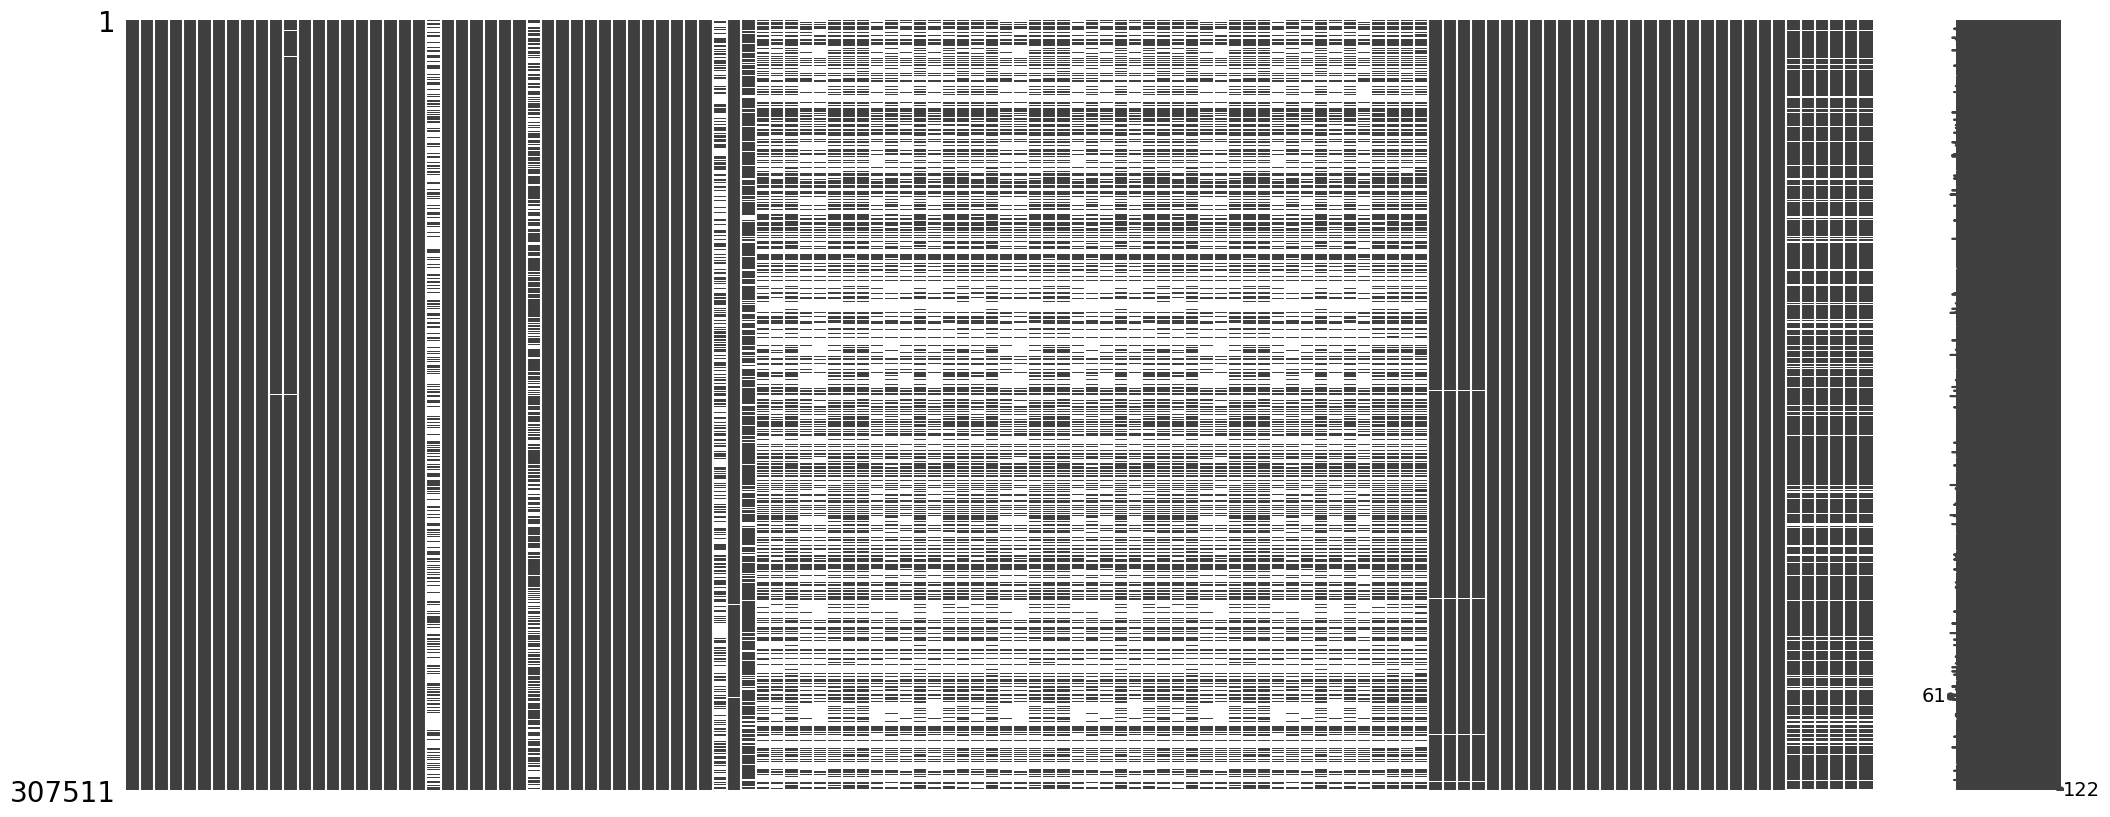

In [18]:
msno.matrix(df)

<Axes: >

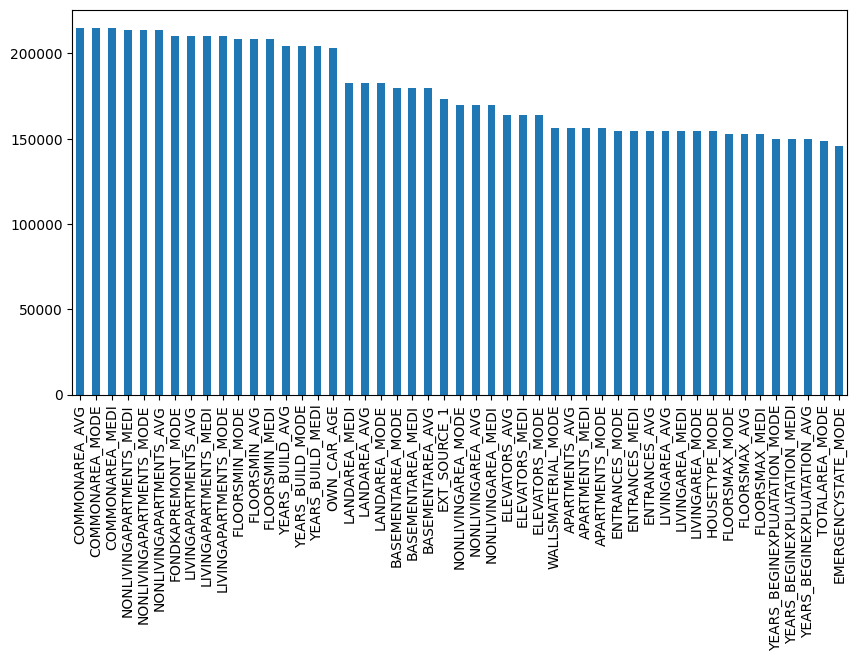

In [19]:
null_col.plot(kind='bar')

In [20]:
def remove_nulls(data):
    perc= 0.45
    null_data = data.copy()
    shape_before = null_data.shape
    remove_cols = null_data.isnull().sum()/len(null_data)
    remove_cols = list(remove_cols[remove_cols.values > perc].index)
    null_data.drop(labels = remove_cols,axis=1,inplace=True)
    print("No of columns dropped",len(remove_cols))
    print('R&C before',shape_before,'R&C after',null_data.shape)
    return null_data
    

In [21]:
df_c = remove_nulls(df)

No of columns dropped 49
R&C before (307511, 122) R&C after (307511, 73)


In [22]:
null_col = df_c.isnull().sum().sort_values(ascending=False)
null_perc = df_c.isnull().sum()/len(df)*100
null_perc.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
SK_ID_CURR                      0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET          

In [23]:
df_c.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [24]:
df_c.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [25]:
impute_list = ['AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_QRT',      
'AMT_REQ_CREDIT_BUREAU_HOUR',     
'AMT_REQ_CREDIT_BUREAU_MON', 
'AMT_REQ_CREDIT_BUREAU_WEEK',     
'AMT_REQ_CREDIT_BUREAU_DAY']

for i in impute_list:
    df_c[i] = df_c[i].fillna(0)

In [26]:
impute_list = ['AMT_REQ_CREDIT_BUREAU_YEAR',   # above code can also be written like this
'AMT_REQ_CREDIT_BUREAU_QRT',      
'AMT_REQ_CREDIT_BUREAU_HOUR',     
'AMT_REQ_CREDIT_BUREAU_MON', 
'AMT_REQ_CREDIT_BUREAU_WEEK',     
'AMT_REQ_CREDIT_BUREAU_DAY']

df_c[impute_list] = df_c[impute_list].fillna(0)

In [27]:
null_perc = df_c.isnull().sum()/len(df)*100
null_perc.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
AMT_CREDIT                      0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET                          0.000000
SK_ID_CURR                      0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE

In [28]:
df_c['AMT_ANNUITY '] = df_c['AMT_ANNUITY'].fillna(df_c.AMT_ANNUITY.median())

In [29]:
df_c['AMT_GOODS_PRICE'] = df_c['AMT_GOODS_PRICE'].fillna(df_c.AMT_ANNUITY.median())

In [30]:
null_perc = df_c.isnull().sum()/len(df)*100
null_perc.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
AMT_CREDIT                      0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET                          0.000000
SK_ID_CURR                      0.000000
AMT_INCOME_TOTAL                0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
AMT_GOODS_PRICE                 0.000000
NAME_INCOME_TYPE

In [31]:
df_c['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [32]:
df_c['DAYS_BIRTH'].nunique()

17460

In [33]:
df_c['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [34]:
error_columns = ['DAYS_ID_PUBLISH',          
'DAYS_REGISTRATION',              
'DAYS_EMPLOYED',  
'DAYS_BIRTH',                               
'DAYS_LAST_PHONE_CHANGE']

df_c[error_columns] = abs(df_c[error_columns])

In [35]:
df_c['DAYS_BIRTH'].unique()

array([ 9461, 16765, 19046, ...,  7951,  7857, 25061])

In [36]:
df_c.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [37]:
df_c['CODE_GENDER'].value_counts()      # same as above code

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [38]:
df_c.loc[df_c.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

In [39]:
df_c.loc[df_c['CODE_GENDER' ]== 'XNA','CODE_GENDER'] = 'F'      # same as above code

In [40]:
df_c['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [41]:
df_c.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [42]:
# replace XNA values with NAN.
#  np.NAN was removed in the munpy 2.0 release .Use np.nan instead

df_c['ORGANIZATION_TYPE'] == df_c['ORGANIZATION_TYPE'].replace('XNA',np.nan,inplace=True)

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: ORGANIZATION_TYPE, Length: 307511, dtype: bool

In [43]:
df_c.ORGANIZATION_TYPE.value_counts()   # we will not see Na values down here because 
                                        # because value counts doesnt consider Na values

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [44]:
df_c['AMT_INCOME_RANGE'] = pd.qcut(df_c['AMT_INCOME_TOTAL'],q=[0,.2,.5,.8,.95,1],
                                   labels=["Very low","Low","Medium","High","Very high"])

In [45]:
df_c['AMT_INCOME_RANGE'].head()

0      Medium
1        High
2    Very low
3         Low
4         Low
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['Very low' < 'Low' < 'Medium' < 'High' < 'Very high']

In [46]:
df_c['AMT_INCOME_RANGE'].unique()

['Medium', 'High', 'Very low', 'Low', 'Very high']
Categories (5, object): ['Very low' < 'Low' < 'Medium' < 'High' < 'Very high']

In [47]:
df_c['AMT_INCOME_RANGE'].value_counts()

AMT_INCOME_RANGE
Medium       106633
Low           90089
Very low      63671
High          33083
Very high     14035
Name: count, dtype: int64

In [48]:
df_c['AMT_CREDIT_RANGE'] = pd.qcut(df_c['AMT_CREDIT'],q=[0,.2,.5,.8,.95,1],
                                   labels=["Very low","Low","Medium","High","Very high"])

In [49]:
df_c['AMT_CREDIT_RANGE'].head()

0         Low
1        High
2    Very low
3         Low
4         Low
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['Very low' < 'Low' < 'Medium' < 'High' < 'Very high']

In [50]:
df_c['AMT_CREDIT_RANGE'].value_counts()

AMT_CREDIT_RANGE
Medium       94750
Low          88924
Very low     64925
High         44878
Very high    14034
Name: count, dtype: int64

In [51]:
df_c['DAYS_BIRTH'] = (df_c['DAYS_BIRTH']/365).astype(int)

In [52]:
df_c["DAYS_BIRTH"].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [53]:
df_c["DAYS_BIRTH"].nunique()

50

In [54]:
df_c['DAYS_BIRTH_BIN'] = pd.cut(df_c['DAYS_BIRTH'], 
                                bins=[19, 25, 35, 60, 100], 
                                labels=["Very young", "Young", "Middle age", "Old age"])



In [55]:
df_c['DAYS_BIRTH_BIN'].value_counts()

DAYS_BIRTH_BIN
Middle age    185900
Young          75925
Old age        29368
Very young     16318
Name: count, dtype: int64

In [56]:
df_defaulters = df_c[df_c['TARGET']== 1]
df_non_defaulters = df_c[df_c.TARGET == 0]

In [57]:
df_defaulters.shape

(24825, 77)

In [58]:
df_non_defaulters.shape

(282686, 77)

In [59]:
df_c['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [60]:
df_c['TARGET'].value_counts(normalize=True).mul(100)

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Loan application by occupation')

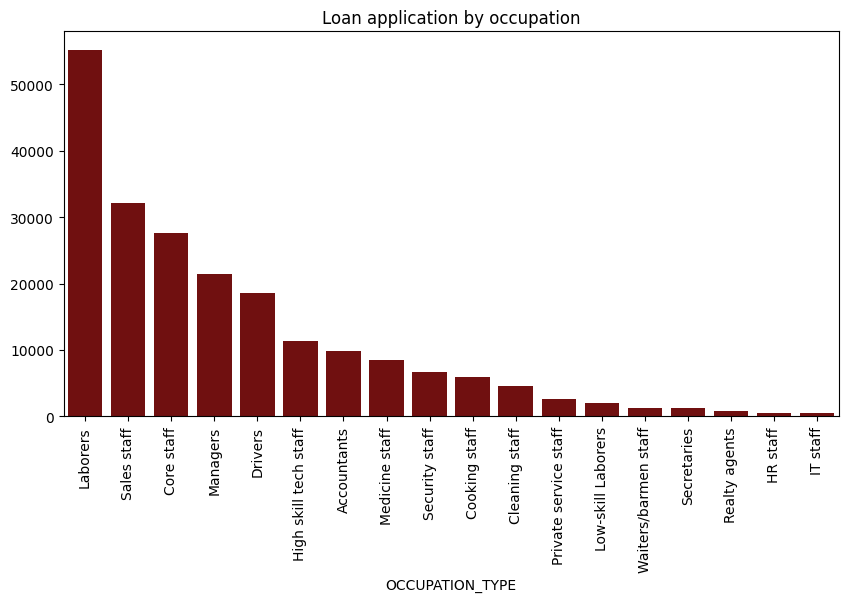

In [61]:
df_c_occupation = df_c['OCCUPATION_TYPE'].value_counts()
sns.barplot(x=df_c_occupation.index,y = df_c_occupation.values,color='maroon')
plt.xticks(rotation = 90)
plt.title("Loan application by occupation")

Text(0.5, 1.0, 'Loan application by organization type')

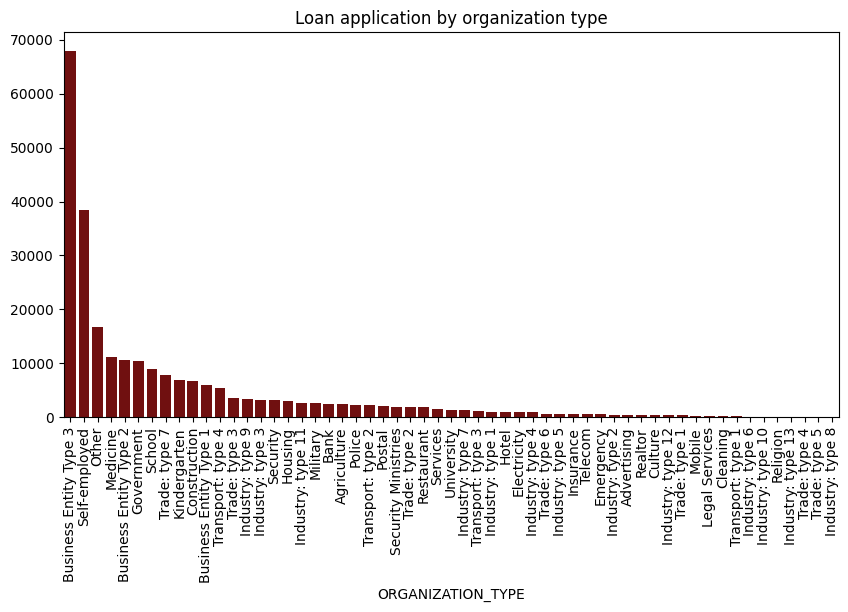

In [62]:
df_c_org_typ = df_c['ORGANIZATION_TYPE'].value_counts()
sns.barplot(x=df_c_org_typ.index,y = df_c_org_typ.values,color='maroon')
plt.xticks(rotation = 90)
plt.title("Loan application by organization type")

Text(0.5, 1.0, 'Loan application by age group')

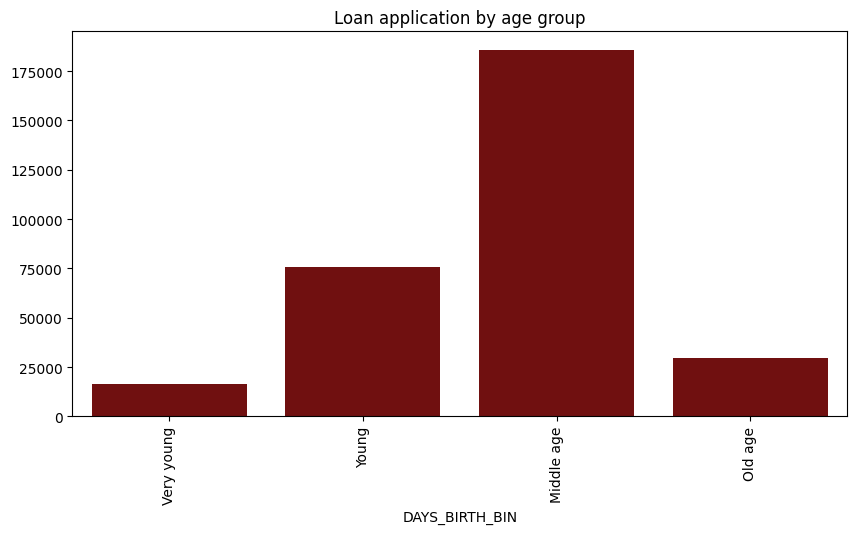

In [63]:
df_c_age = df_c['DAYS_BIRTH_BIN'].value_counts()
sns.barplot(x=df_c_age.index,y = df_c_age.values,color='maroon')
plt.xticks(rotation = 90)
plt.title("Loan application by age group")


Text(0.5, 1.0, 'Loan application by income range')

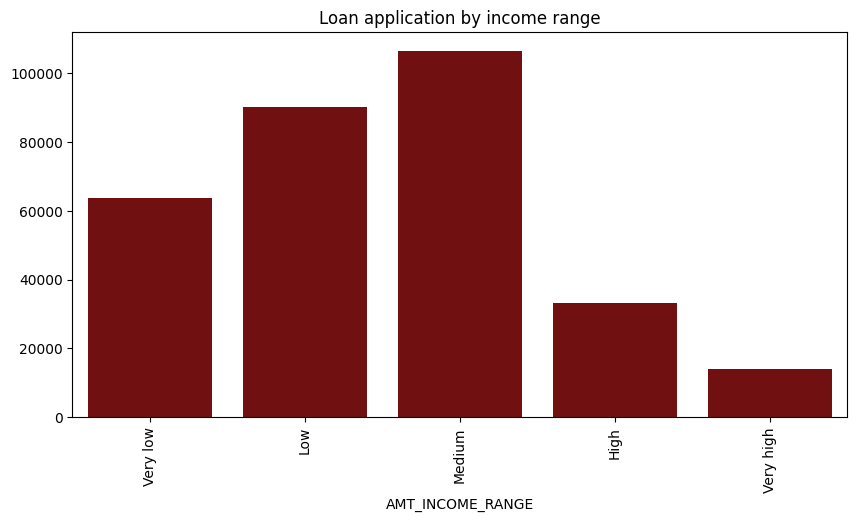

In [64]:
df_c_inc_rang = df_c['AMT_INCOME_RANGE'].value_counts()
sns.barplot(x=df_c_inc_rang.index,y = df_c_inc_rang.values,color='maroon')
plt.xticks(rotation = 90)
plt.title("Loan application by income range")


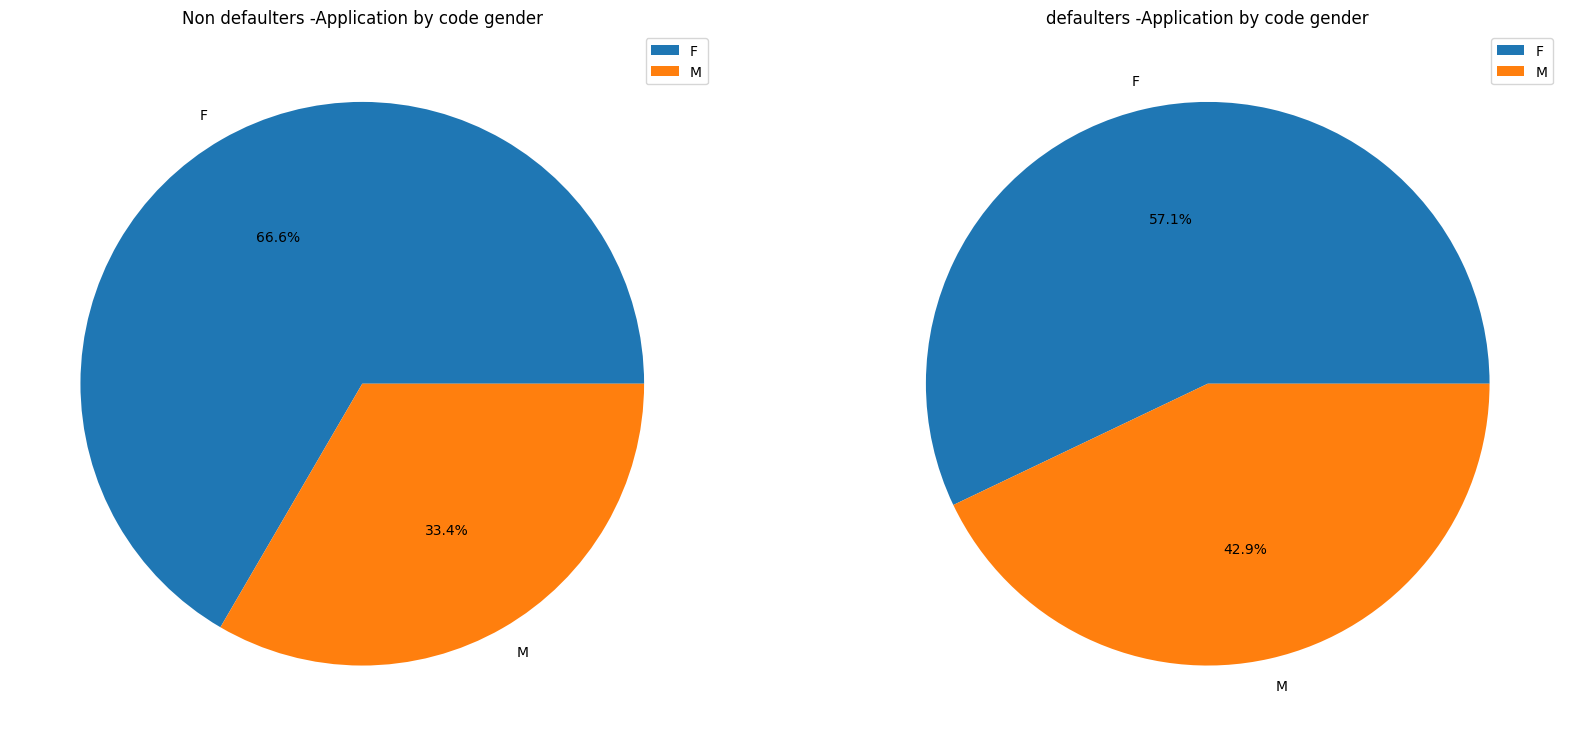

In [65]:
# gender defaulter vs non defaulter

colors = sns.color_palette('tab10')[0:5]

fig,axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("box plot of ")

data = df_non_defaulters['CODE_GENDER'].value_counts()
data_df = pd.DataFrame({'labels':data.index,'values':data.values})

# pie chart for non default
_= axes[0].pie(data_df['values'],labels=data_df['labels'],colors= colors,autopct='%0.1f%%')
_=axes[0].set_title("Non defaulters -Application by code gender")
_=axes[0].legend()



axes[1].set_title("box plot of ")
data1 = df_defaulters['CODE_GENDER'].value_counts()
data_df1 = pd.DataFrame({'labels':data1.index,'values':data1.values})
# pie chart for non default
_= axes[1].pie(data_df1['values'],labels=data_df1['labels'],colors= colors,autopct='%0.1f%%')
_=axes[1].set_title("defaulters -Application by code gender")
_=axes[1].legend()

In [66]:
def univariate_compa(col,hue=None):
    colors = sns.color_palette('tab10')[0:5]

    fig,axes = plt.subplots(1,2,figsize = (20,10))
    axes[0].set_title("box plot of ")

    data = df_non_defaulters[col].value_counts()
    data_df = pd.DataFrame({'labels':data.index,'values':data.values})

    # pie chart for non default
    _= axes[0].pie(data_df['values'],labels=data_df['labels'],colors= colors,autopct='%0.1f%%')
    _=axes[0].set_title("Non defaulters -Application by "+col)
    _=axes[0].legend()



    axes[1].set_title("box plot of ")
    data1 = df_defaulters[col].value_counts()
    data_df1 = pd.DataFrame({'labels':data1.index,'values':data1.values})
    # pie chart for non default
    _= axes[1].pie(data_df1['values'],labels=data_df1['labels'],colors= colors,autopct='%0.1f%%')
    _=axes[1].set_title("defaulters -Application by"+col)
    _=axes[1].legend()


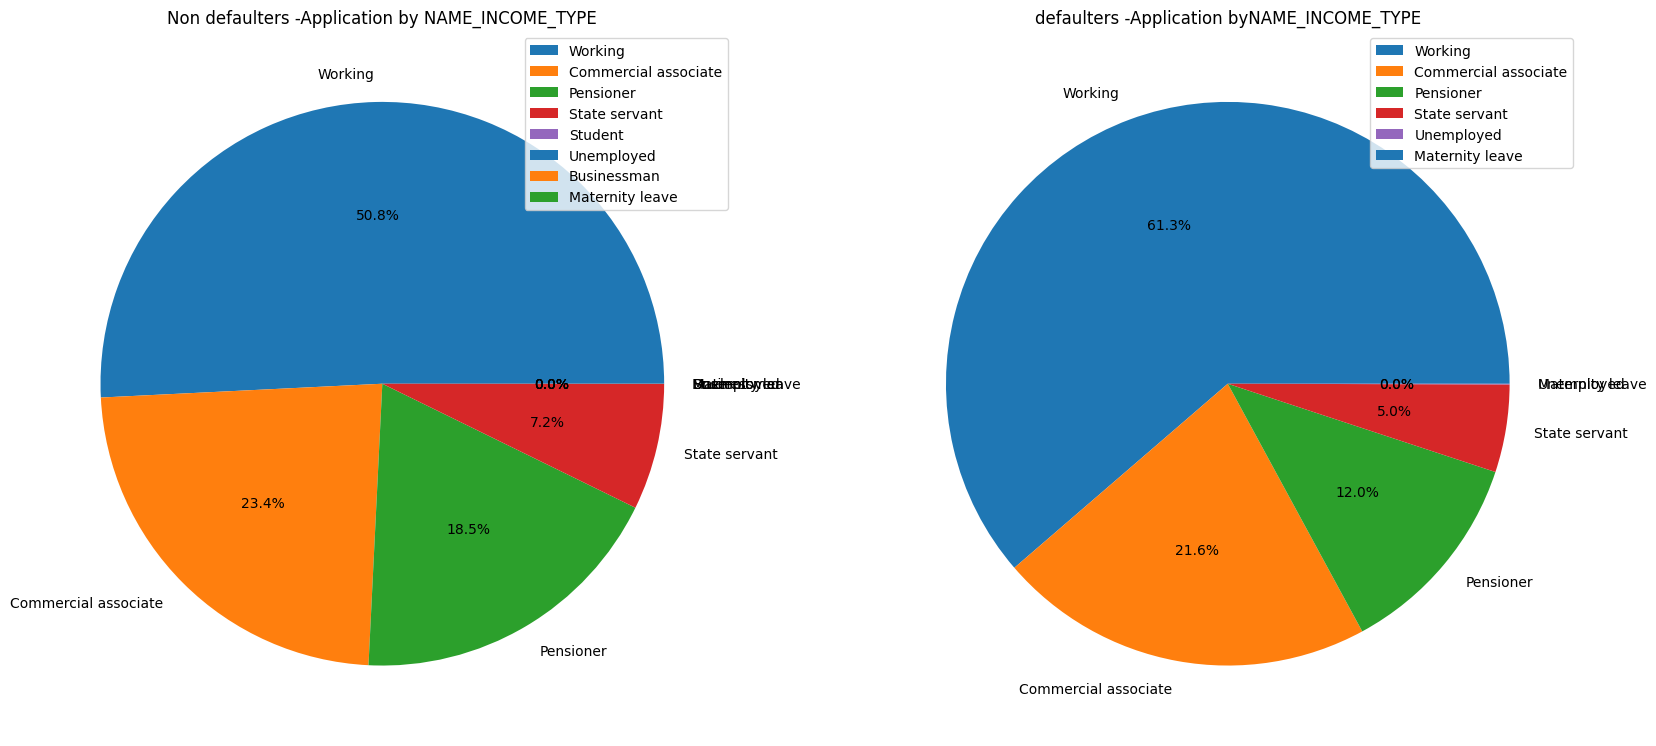

In [67]:
univariate_compa('NAME_INCOME_TYPE')

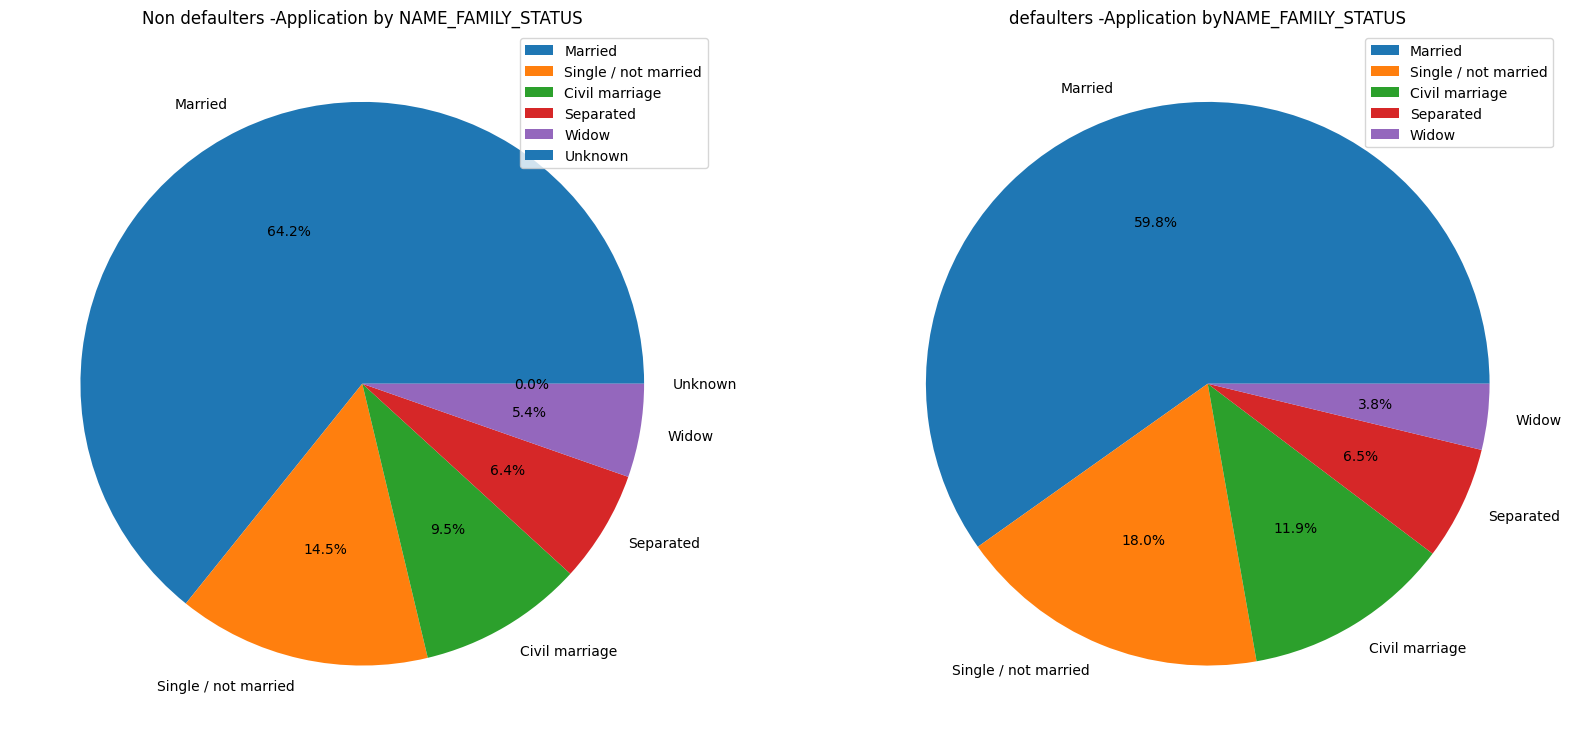

In [68]:
univariate_compa('NAME_FAMILY_STATUS')

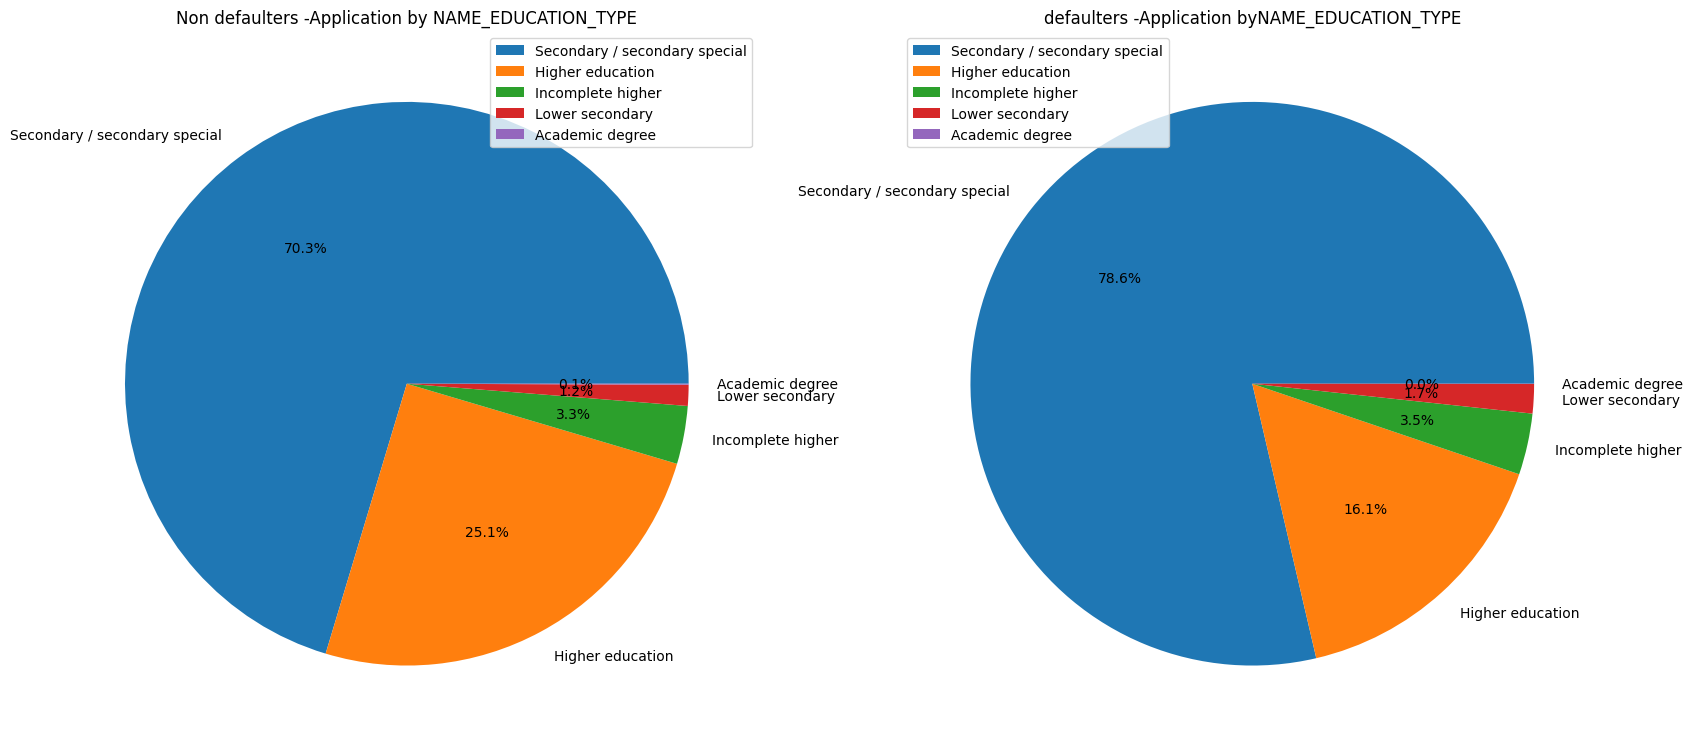

In [69]:
univariate_compa('NAME_EDUCATION_TYPE')

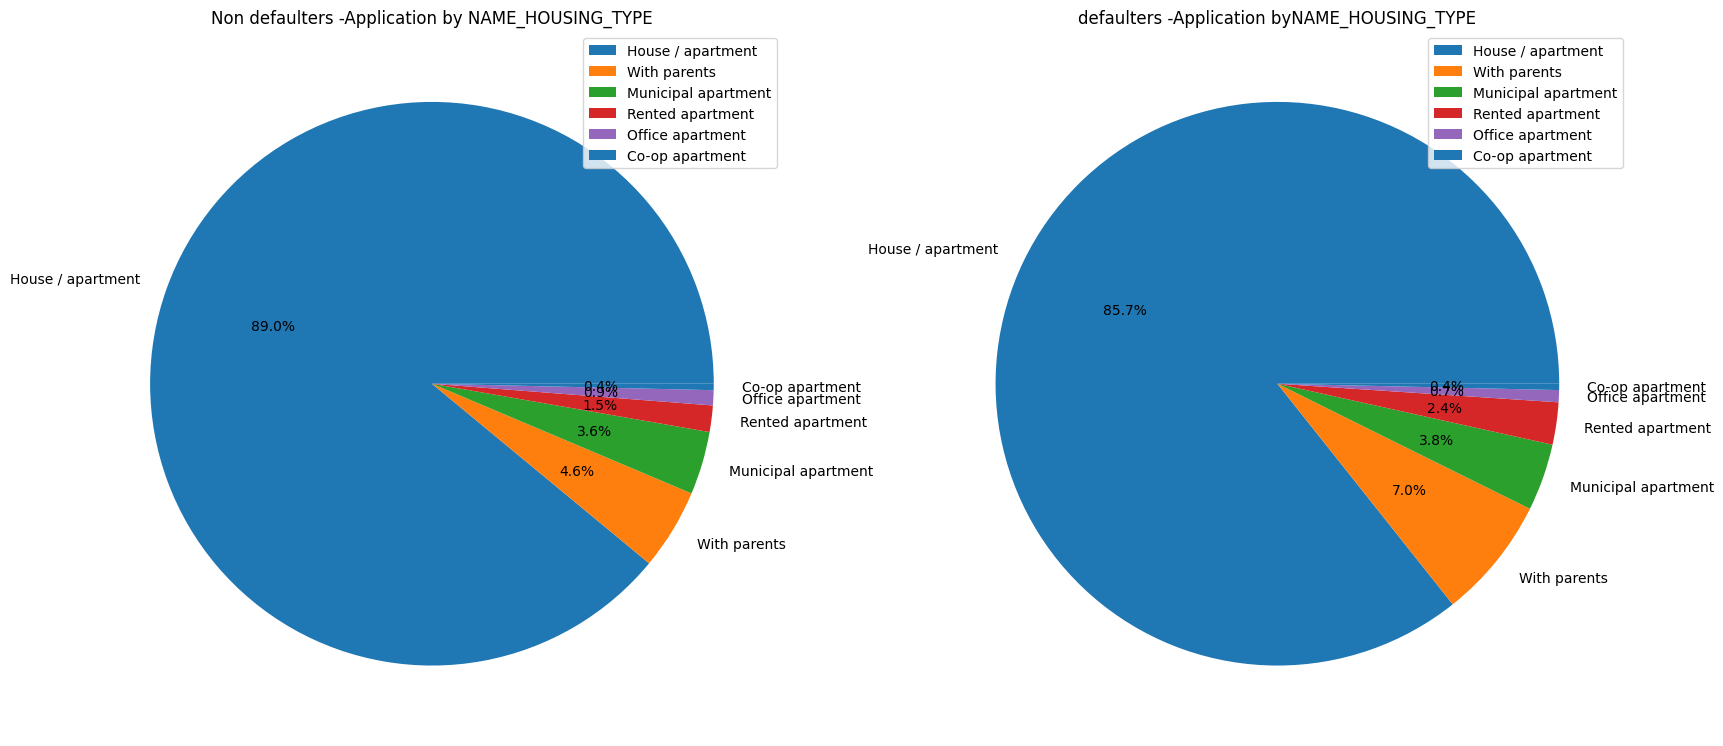

In [70]:
univariate_compa('NAME_HOUSING_TYPE')

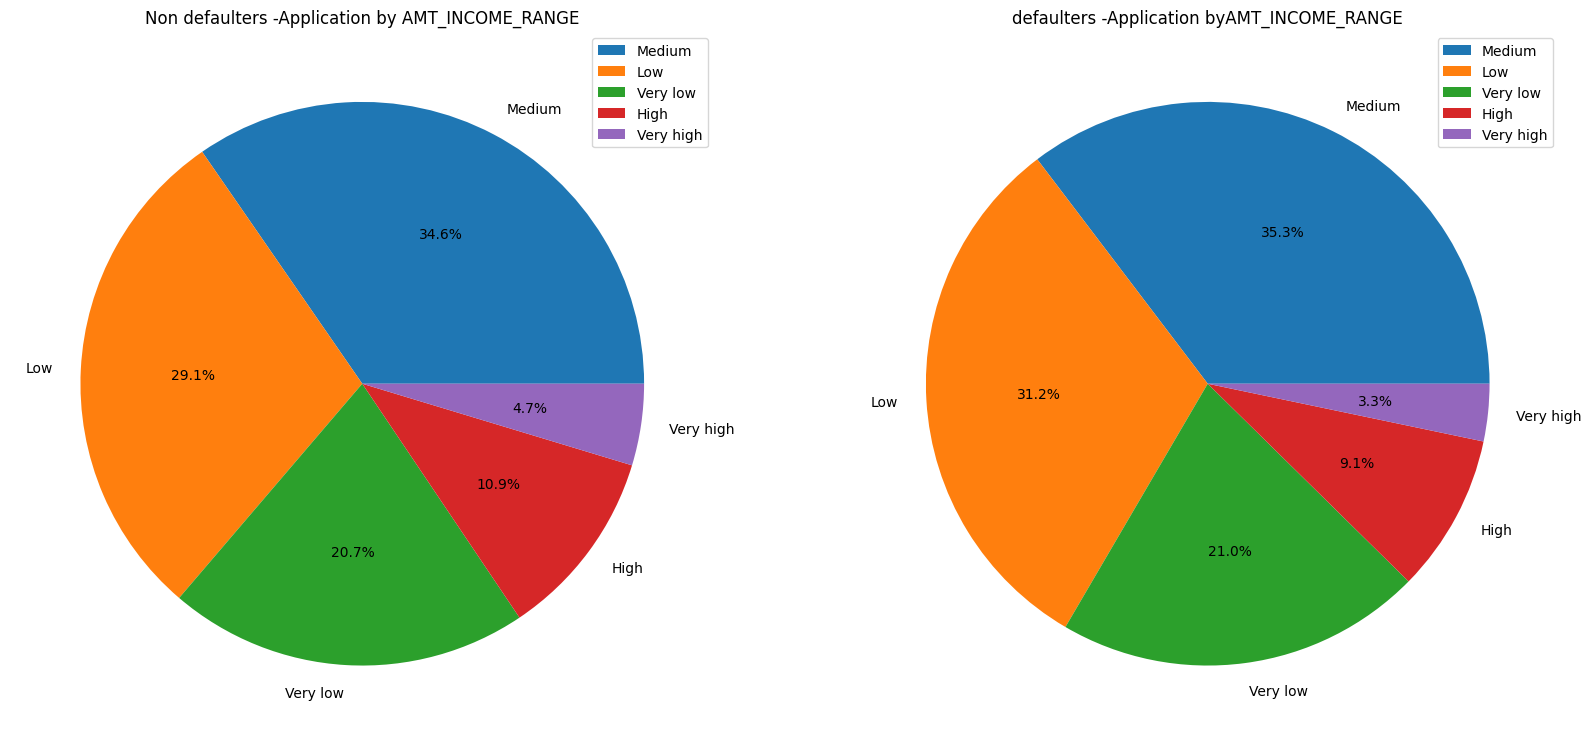

In [71]:
univariate_compa('AMT_INCOME_RANGE')

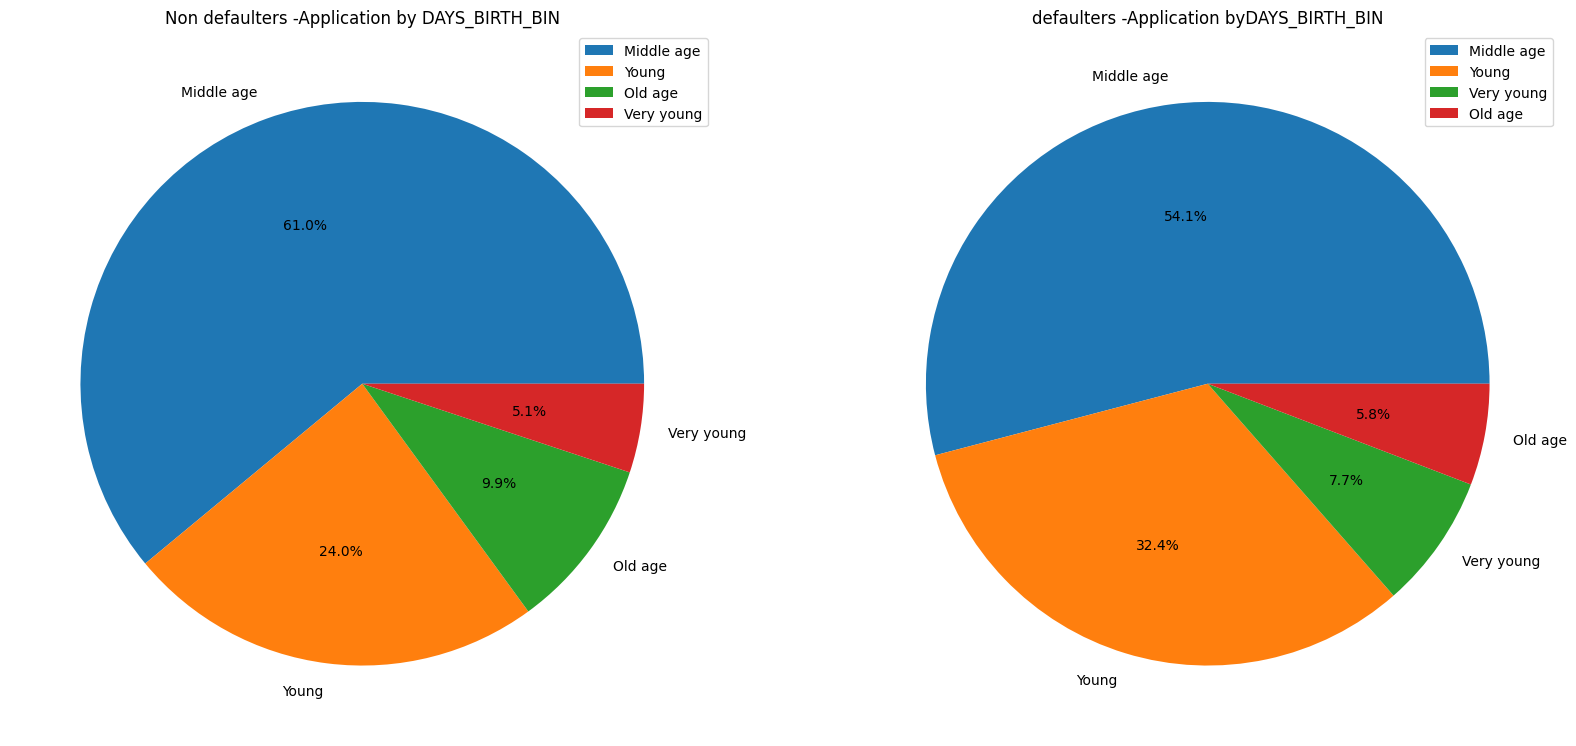

In [72]:
univariate_compa('DAYS_BIRTH_BIN')

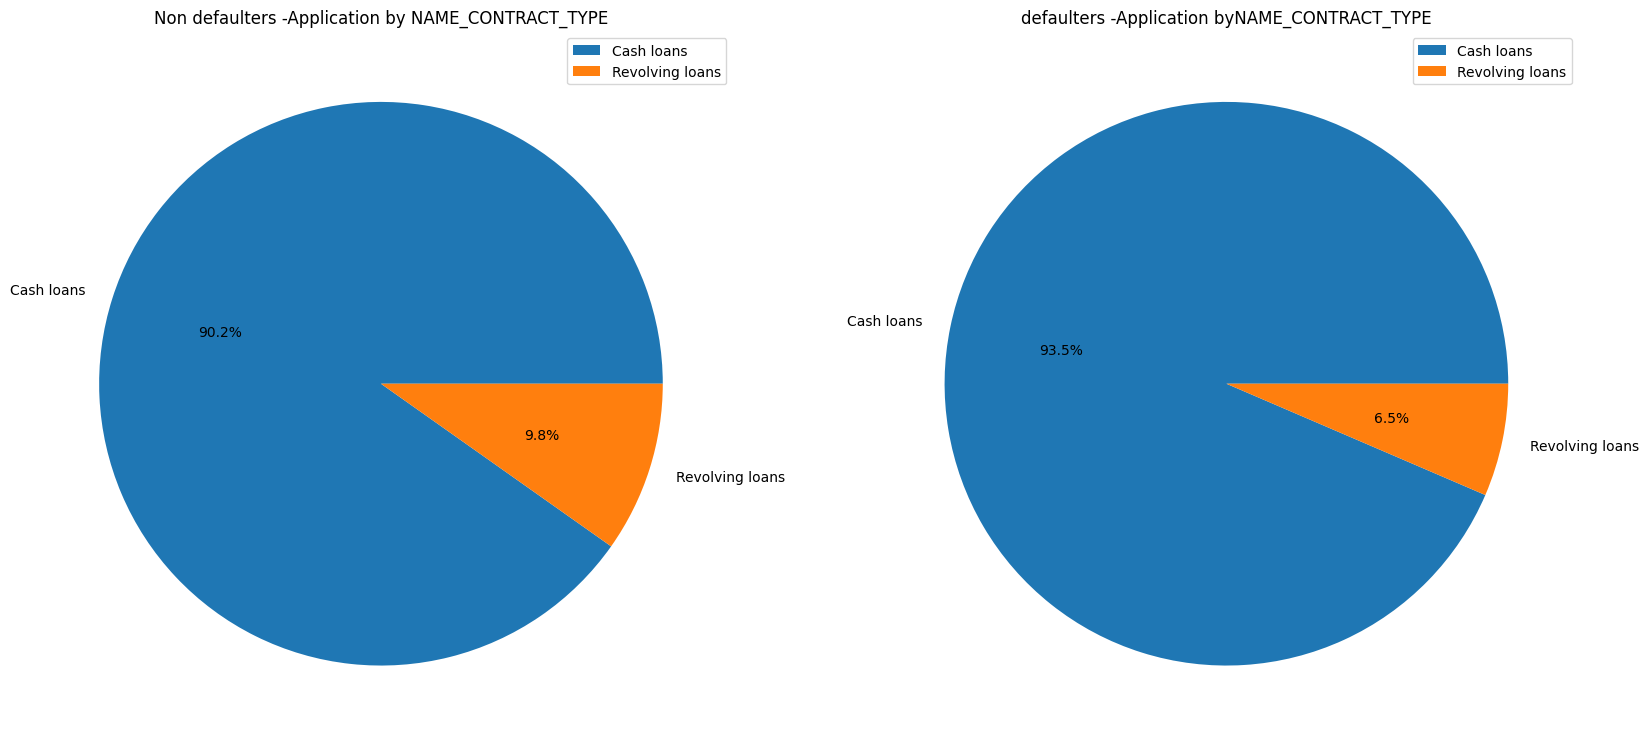

In [73]:
univariate_compa('NAME_CONTRACT_TYPE')

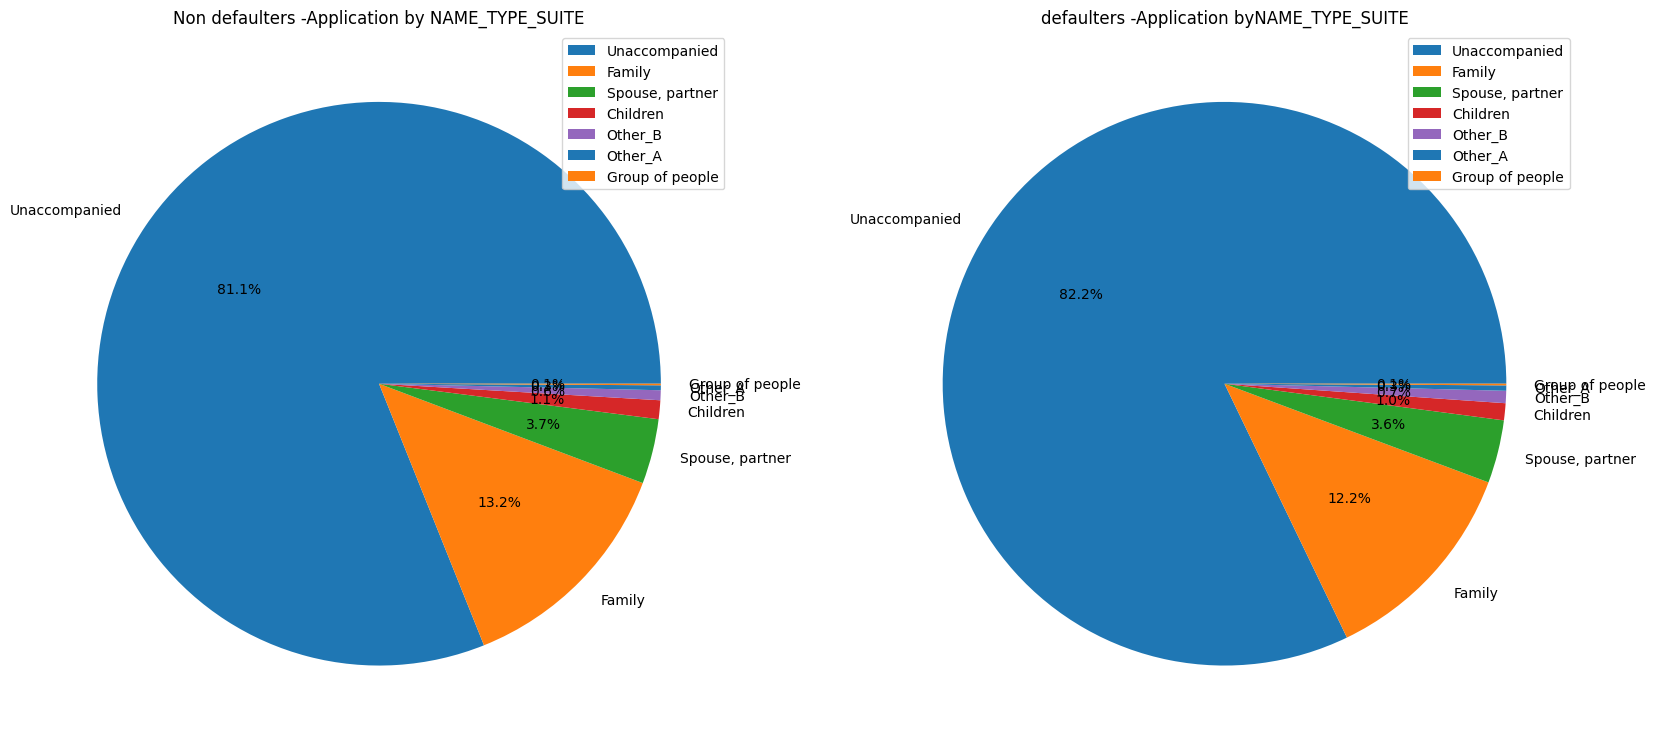

In [74]:
univariate_compa('NAME_TYPE_SUITE')

In [75]:
def uni_comp_quant(col,hue=None):
    fig,axes = plt.subplots(2,2,figsize=(20,12))
    axes[0,0].set_title("Displot for non defaulters "+col)
    sns.distplot(df_non_defaulters[~df_non_defaulters[col].isna()][col],ax=axes[0,0],color='#4CB391')
    
    axes[0,1].set_title("Displot for defaulters "+col)
    sns.distplot(df_defaulters[~df_defaulters[col].isna()][col],ax=axes[0,1],color='#4CB391')
    
    axes[1,0].set_title("Boxplot for non defaulters "+col)
    sns.boxplot(df_non_defaulters[~df_non_defaulters[col].isna()][col],ax=axes[1,0],color='#4CB391')
    
    axes[1,1].set_title("Boxplot for defaulters "+col)
    sns.boxplot(df_defaulters[~df_defaulters[col].isna()][col],ax=axes[1,1],color='#4CB391')
    
    plt.tight_layout()

C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\1580457860.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_non_defaulters[~df_non_defaulters[col].isna()][col],ax=axes[0,0],color='#4CB391')
C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\1580457860.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



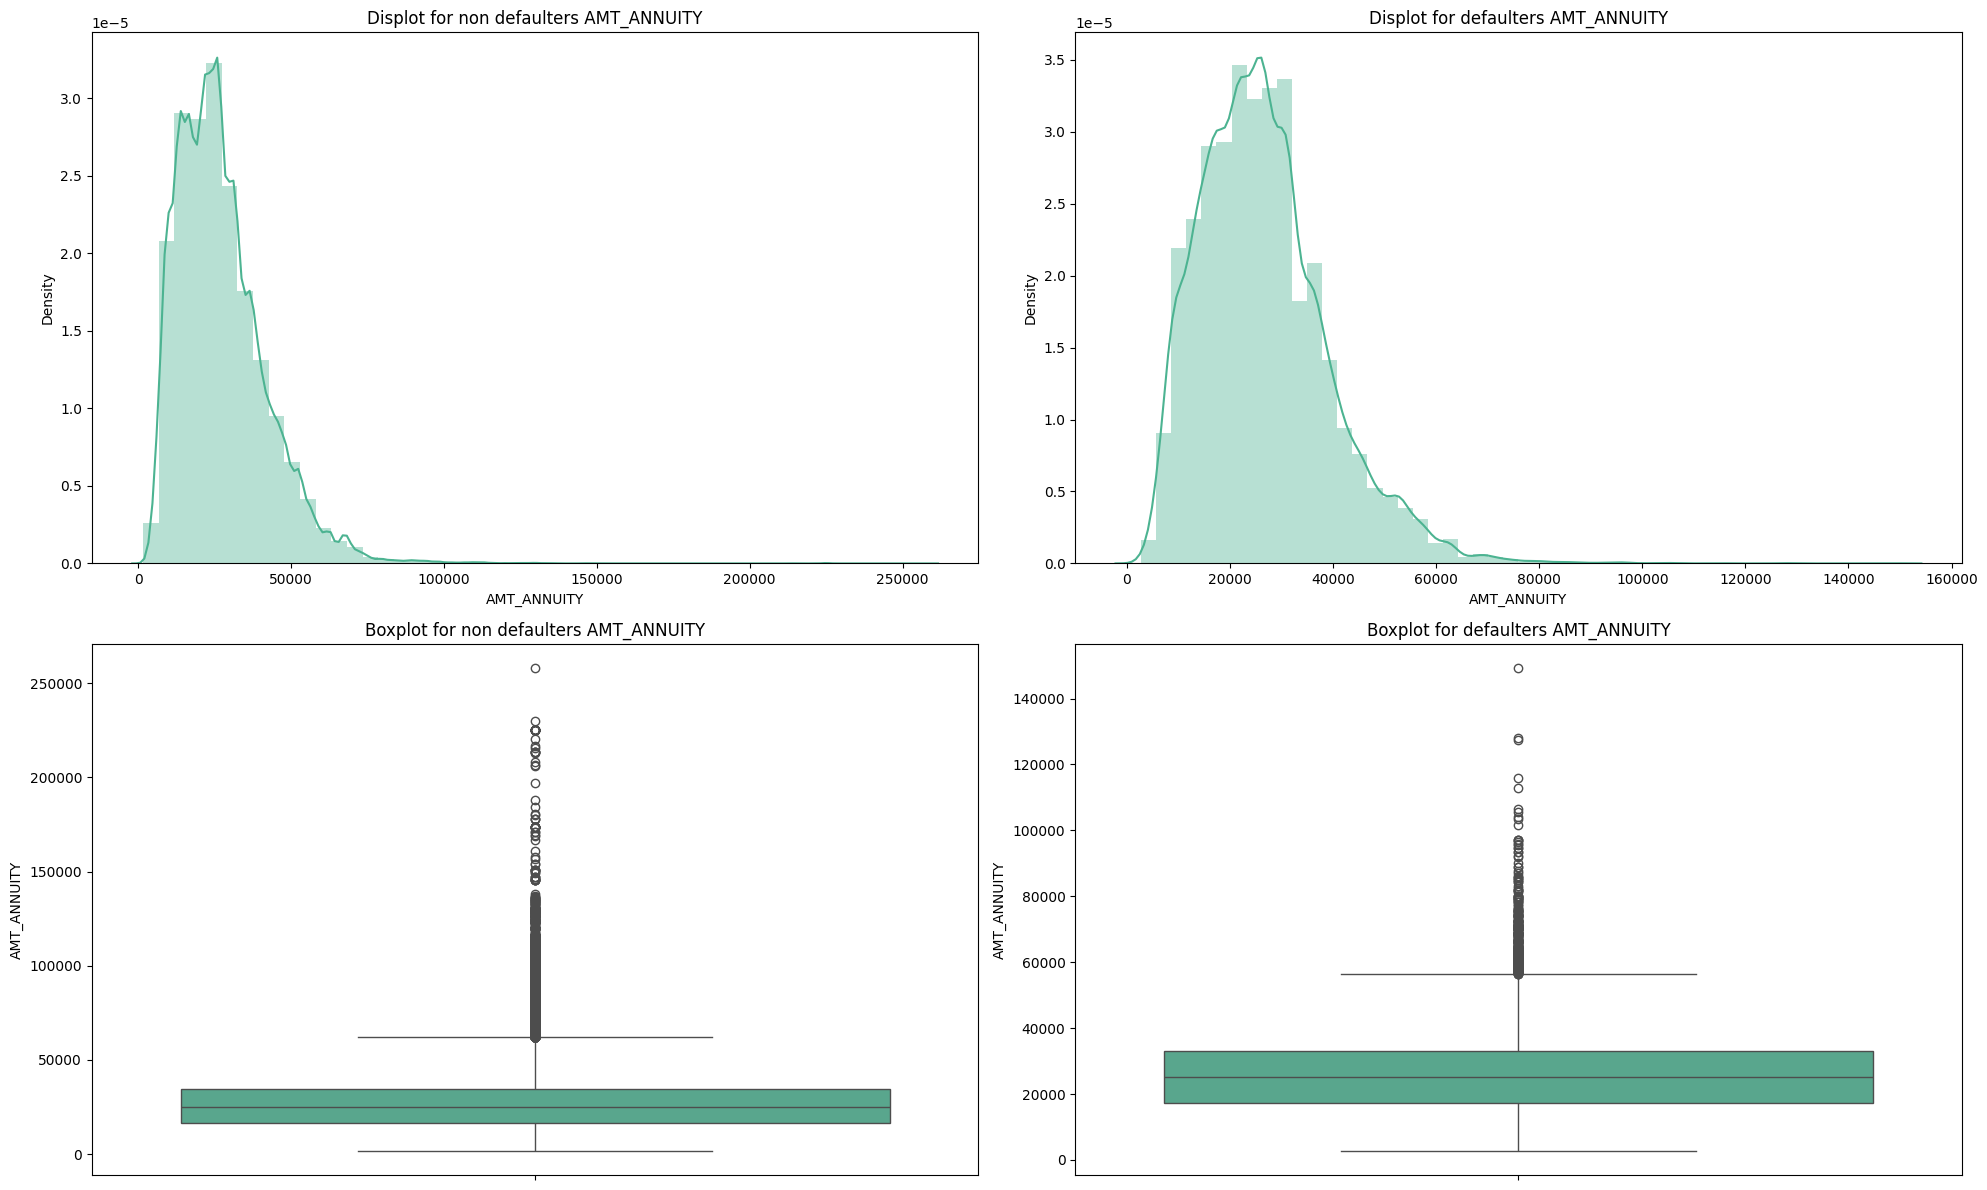

In [76]:
uni_comp_quant('AMT_ANNUITY')

C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\1580457860.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_non_defaulters[~df_non_defaulters[col].isna()][col],ax=axes[0,0],color='#4CB391')
C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\1580457860.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



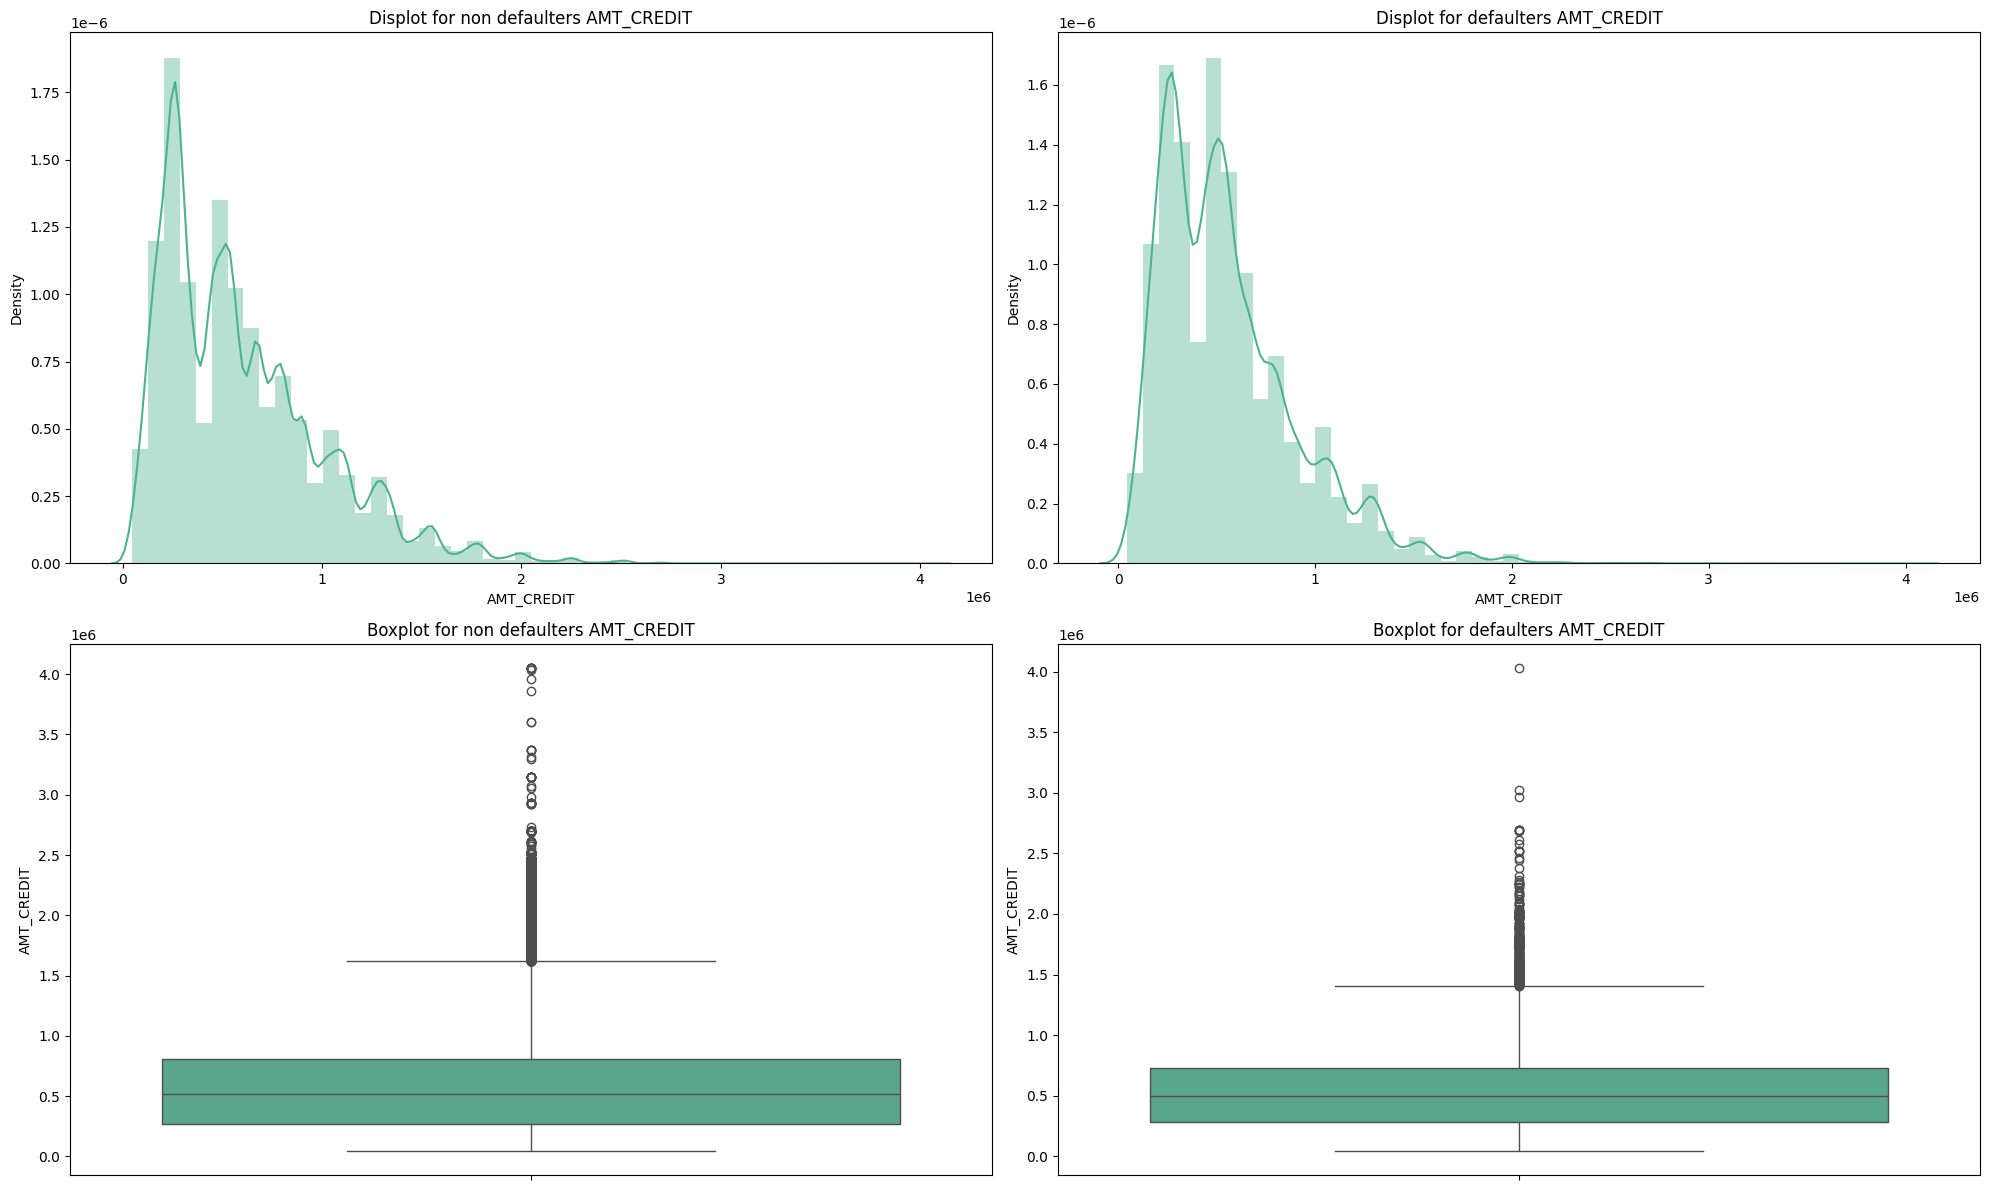

In [77]:
uni_comp_quant('AMT_CREDIT')

C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\1580457860.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_non_defaulters[~df_non_defaulters[col].isna()][col],ax=axes[0,0],color='#4CB391')
C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\1580457860.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



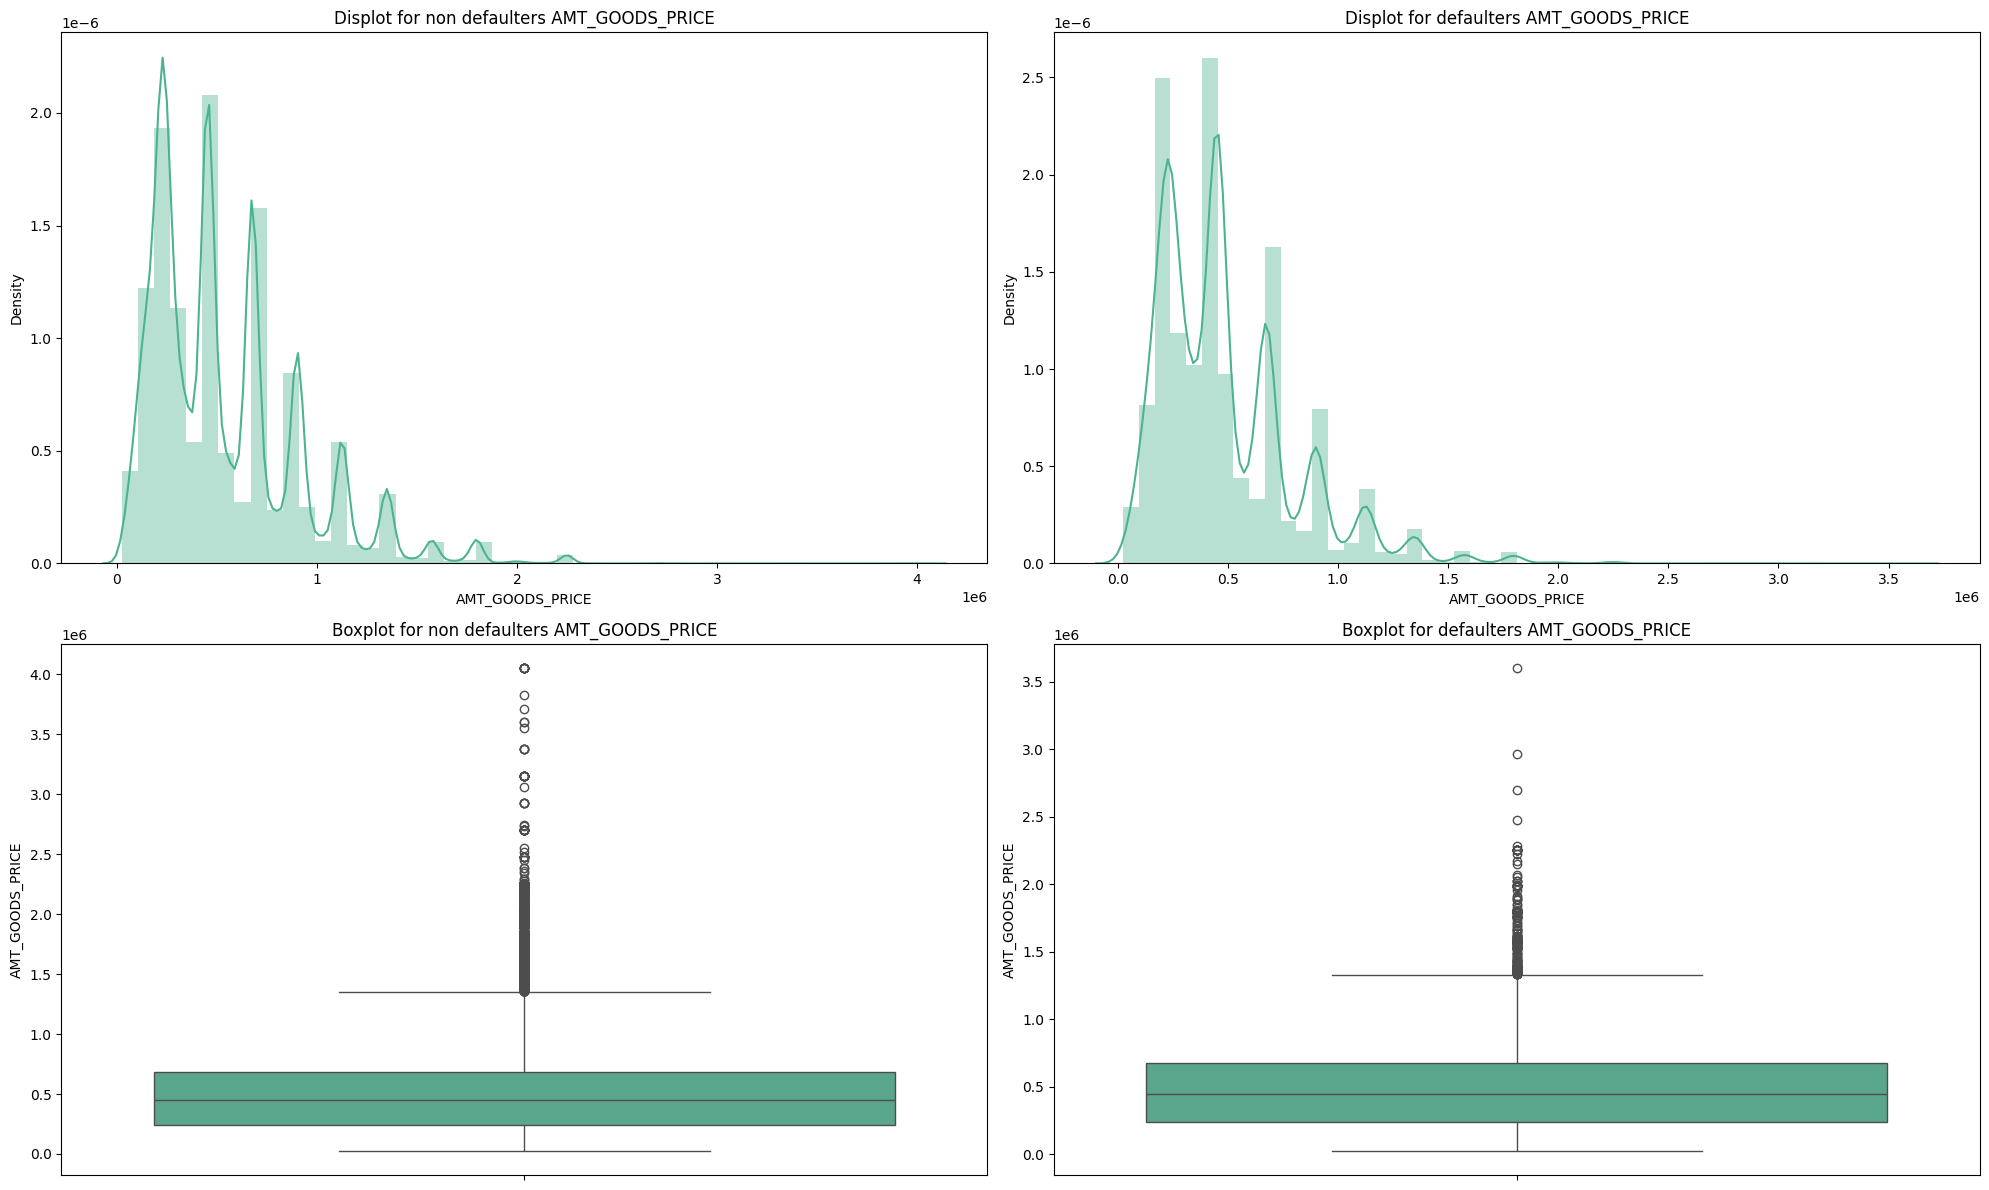

In [78]:
uni_comp_quant('AMT_GOODS_PRICE')

In [79]:
def multivariate(col1,col2,col3):
    fig,axes = plt.subplots(1,2,figsize = (20,12))
    axes[0].set_title("Box plot for non defaulters")
    sns.boxplot(data= df_non_defaulters,x=col1,y = col2,hue=col3,palette='rainbow',ax = axes[0])
    axes[0].set_title("loan amount by "+col2+"&"+col3+' non defaulters')   
    
    axes[1].set_title("Box plot for defaulters")
    sns.boxplot(data= df_defaulters,x=col1,y = col2,hue=col3,palette='rainbow',ax = axes[1])
    axes[1].set_title("loan amount by "+col2+"&"+col3+' defaulters')     

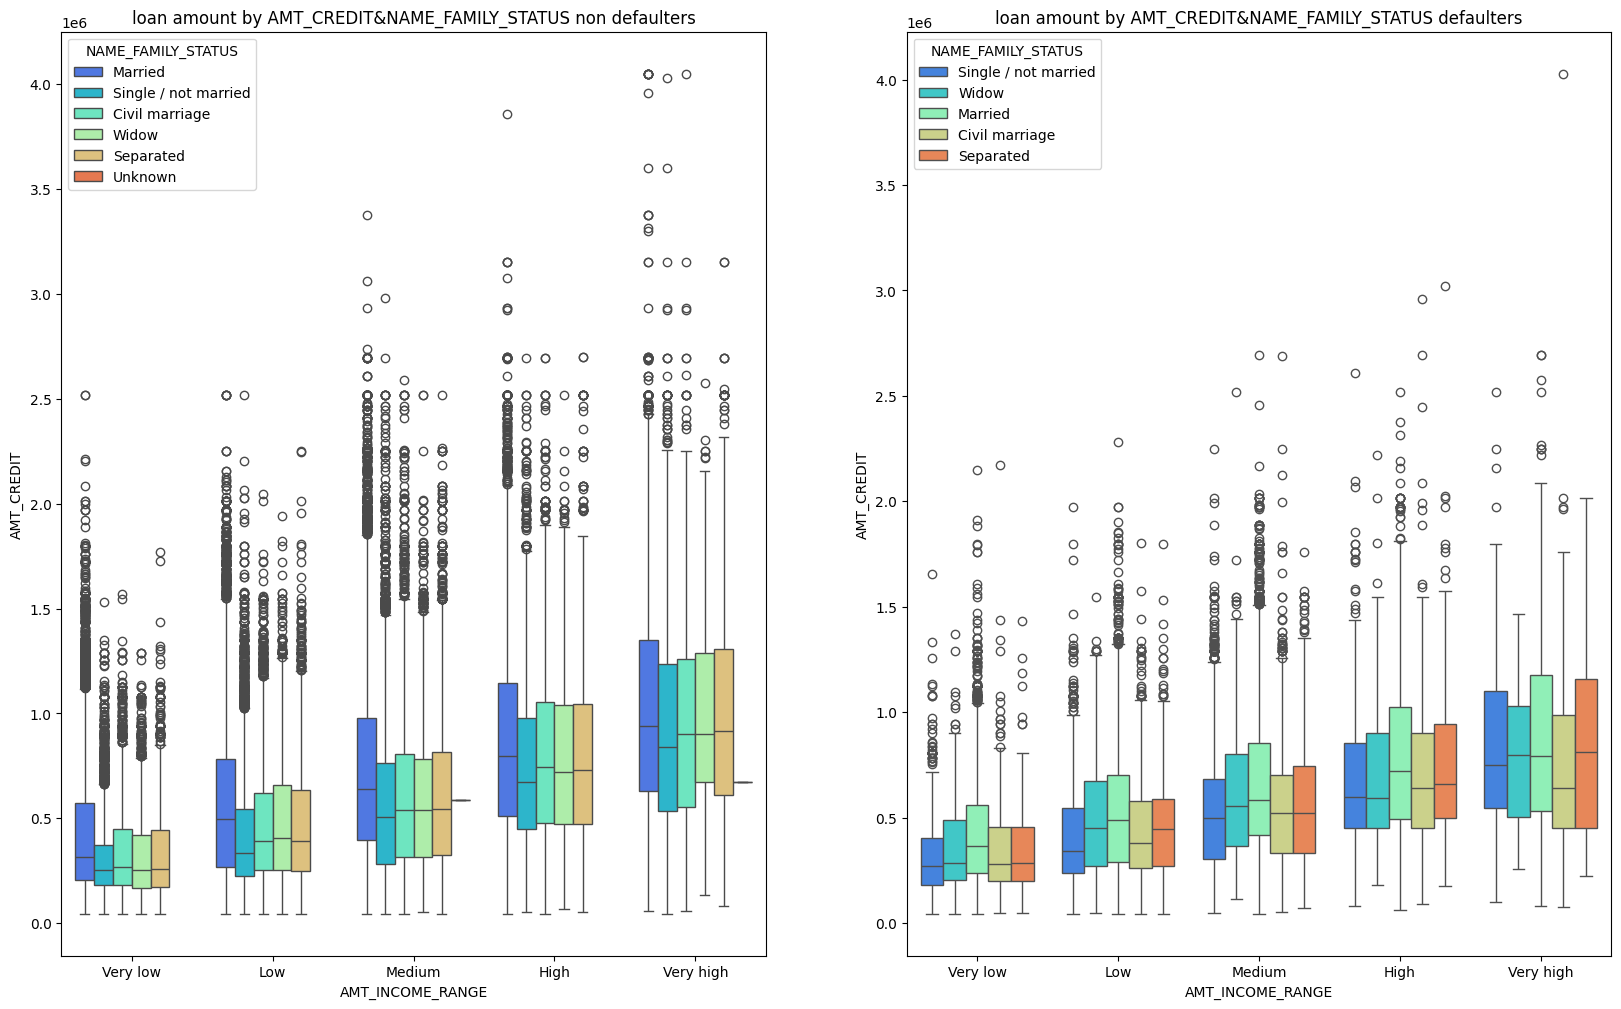

In [80]:
multivariate('AMT_INCOME_RANGE','AMT_CREDIT','NAME_FAMILY_STATUS')

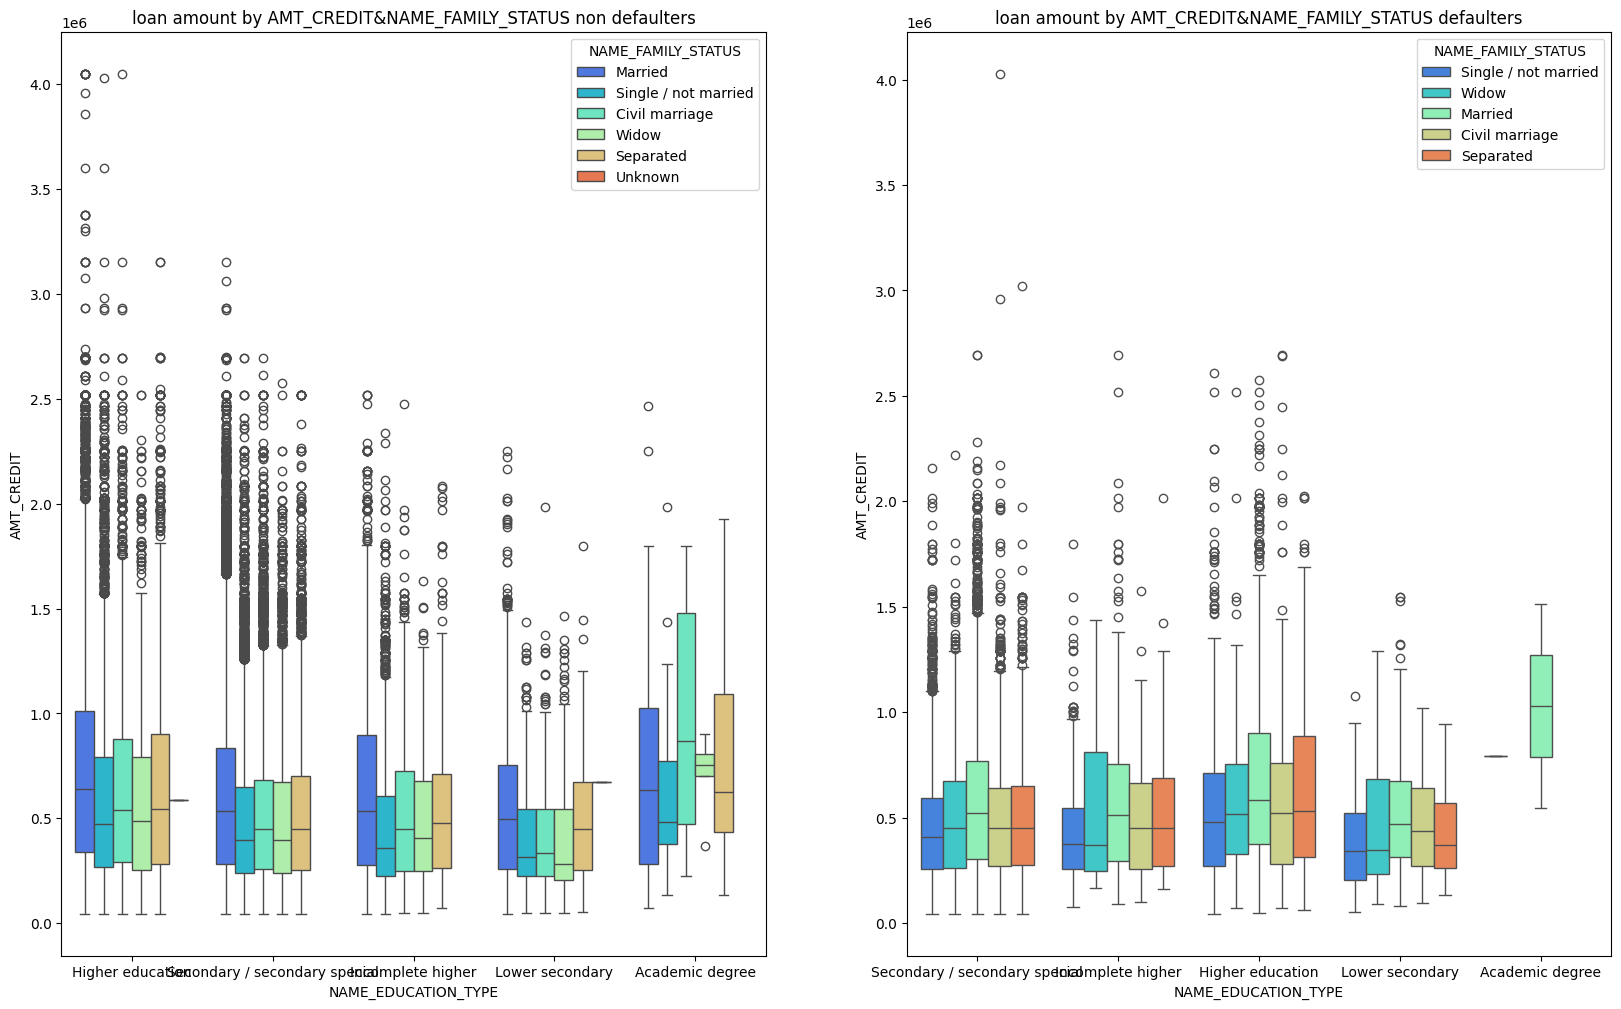

In [81]:
multivariate("NAME_EDUCATION_TYPE","AMT_CREDIT",'NAME_FAMILY_STATUS')

In [82]:
df_c.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,24700.5,Medium,Low,Very young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,35698.5,High,High,Middle age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6750.0,Very low,Very low,Middle age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,29686.5,Low,Low,Middle age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,21865.5,Low,Low,Middle age


In [88]:
df_c.shape

(307511, 77)

In [106]:
def perc_of_defaulters(col):
    fig,axes = plt.subplots(1,2,figsize=(20,12))
    
    total = df_c[[col,'TARGET']].groupby(col).count()
    default_1 = df_defaulters[[col,'TARGET']].groupby(col).count()
    perc = default_1*100/total
    
    axes[0].set_title("Application count by "+col)
    sns.barplot(x=total.index,y=total.TARGET,color = "grey",
                order=total.sort_values('TARGET',ascending=False).index,ax=axes[0])
    axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60)
    
    axes[1].set_title(" % defaulters by "+col)
    sns.barplot(x=perc.index,y=perc.TARGET,color = "#ff597d",
                order=perc.sort_values('TARGET',ascending=False).index,ax=axes[1])
    axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60)
    

C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\163118692.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_c[[col,'TARGET']].groupby(col).count()
C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\163118692.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_1 = df_defaulters[[col,'TARGET']].groupby(col).count()
C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\163118692.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation

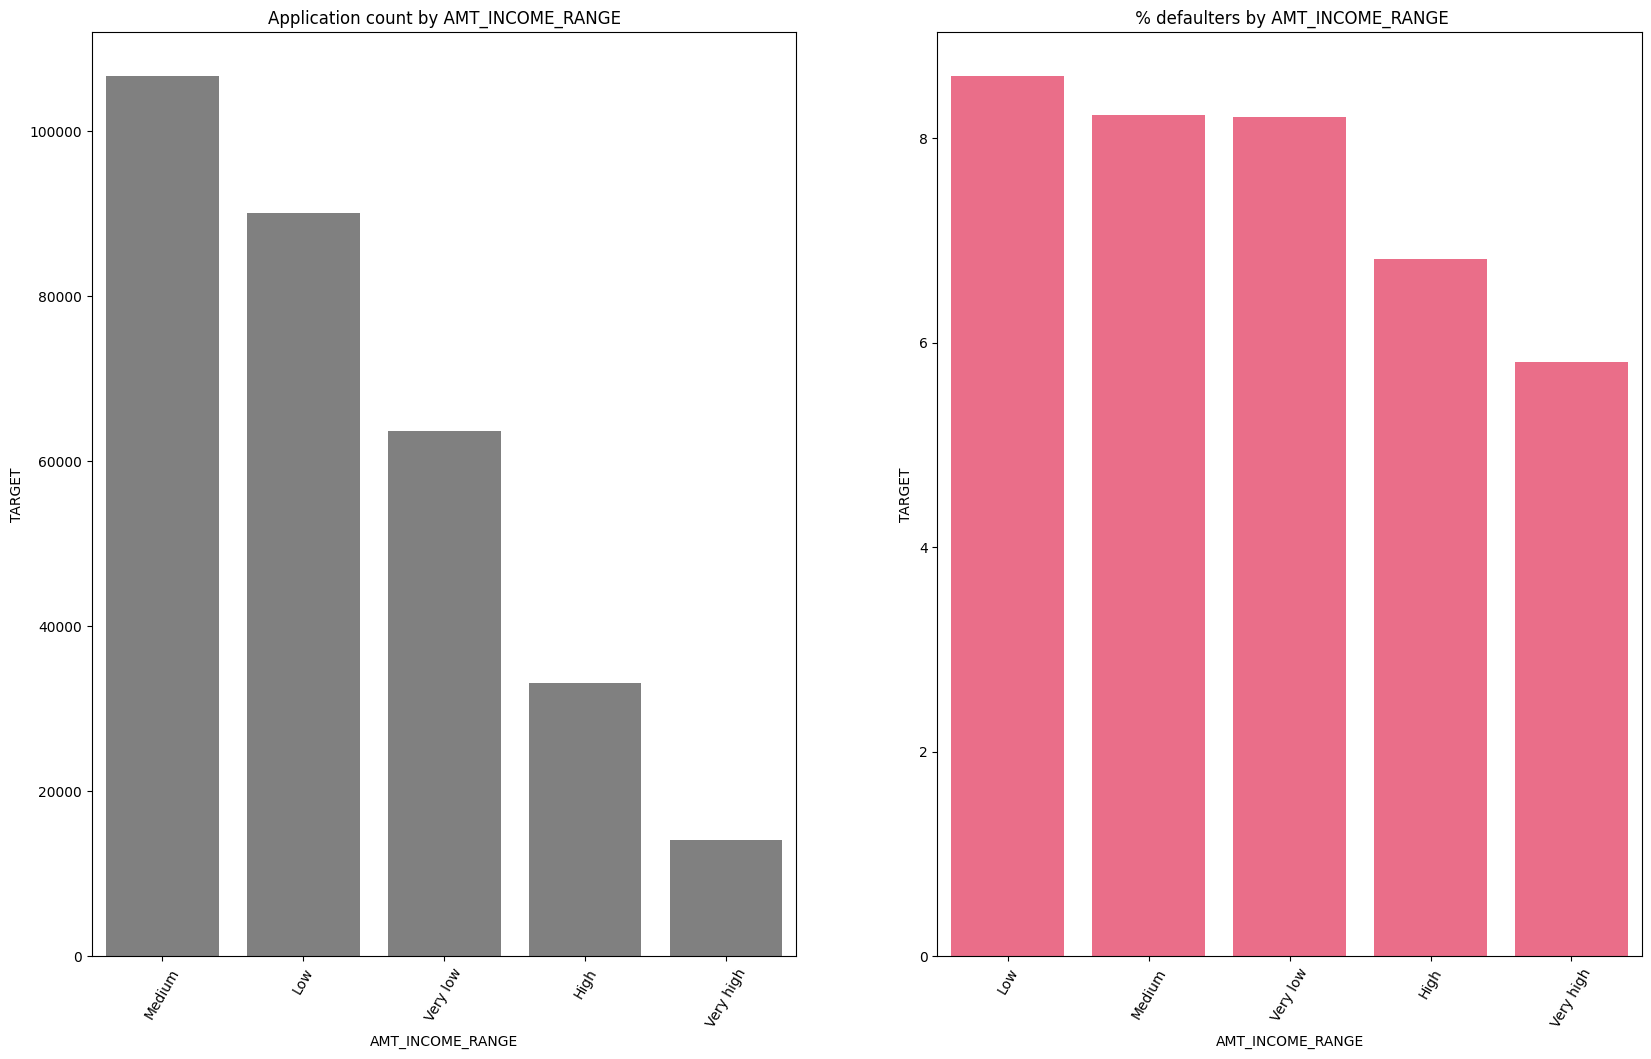

In [107]:
perc_of_defaulters('AMT_INCOME_RANGE')

In [92]:
total = df_c[['AMT_INCOME_RANGE','TARGET']].groupby('AMT_INCOME_RANGE').count()
total

C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\571231767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df_c[['AMT_INCOME_RANGE','TARGET']].groupby('AMT_INCOME_RANGE').count()


,TARGET
AMT_INCOME_RANGE,
Very low,63671
Low,90089
Medium,106633
High,33083
Very high,14035


In [93]:
default_1 = df_defaulters[['AMT_INCOME_RANGE','TARGET']].groupby('AMT_INCOME_RANGE').count()
default_1

C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\3366215072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_1 = df_defaulters[['AMT_INCOME_RANGE','TARGET']].groupby('AMT_INCOME_RANGE').count()


,TARGET
AMT_INCOME_RANGE,
Very low,5225
Low,7755
Medium,8773
High,2256
Very high,816


In [94]:
perc = default_1*100/total

In [95]:
perc

,TARGET
AMT_INCOME_RANGE,
Very low,8.206248
Low,8.608154
Medium,8.227284
High,6.819212
Very high,5.814036


C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\163118692.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60)
C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\163118692.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60)


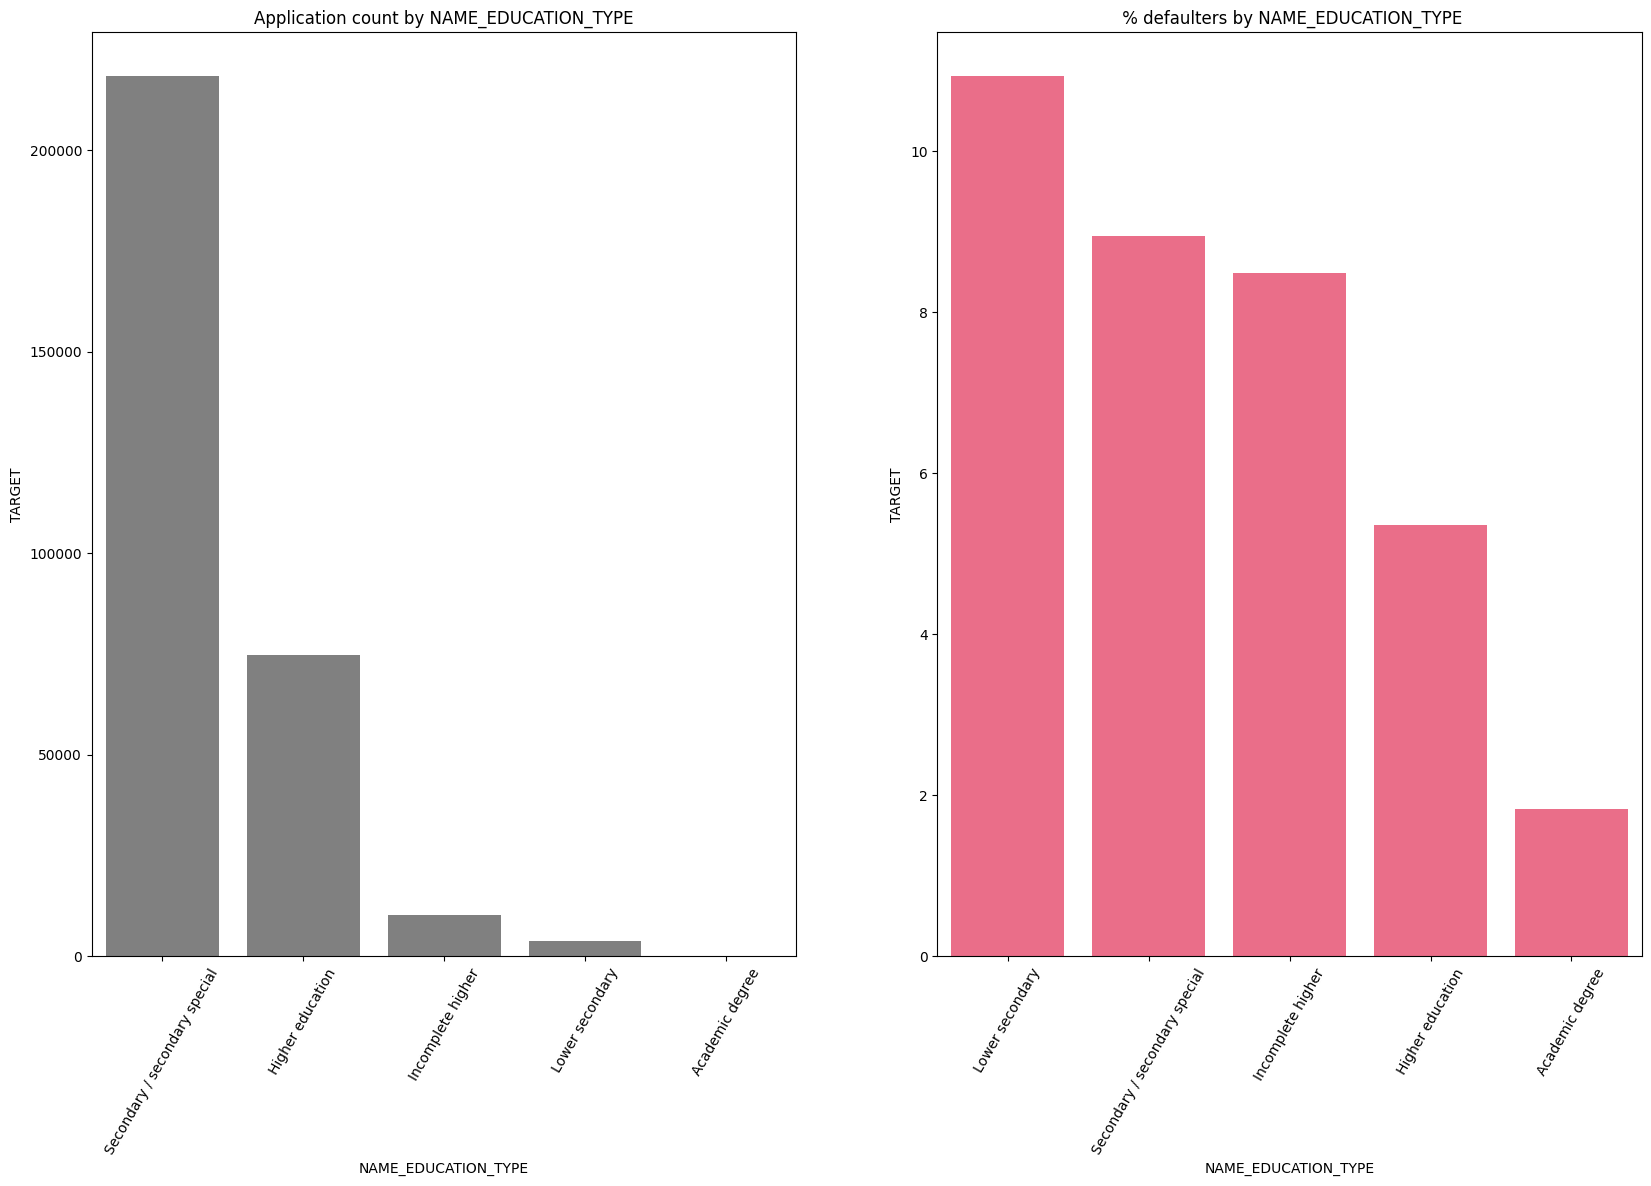

In [109]:
perc_of_defaulters('NAME_EDUCATION_TYPE')

C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\163118692.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60)
C:\Users\dsavr\AppData\Local\Temp\ipykernel_26668\163118692.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60)


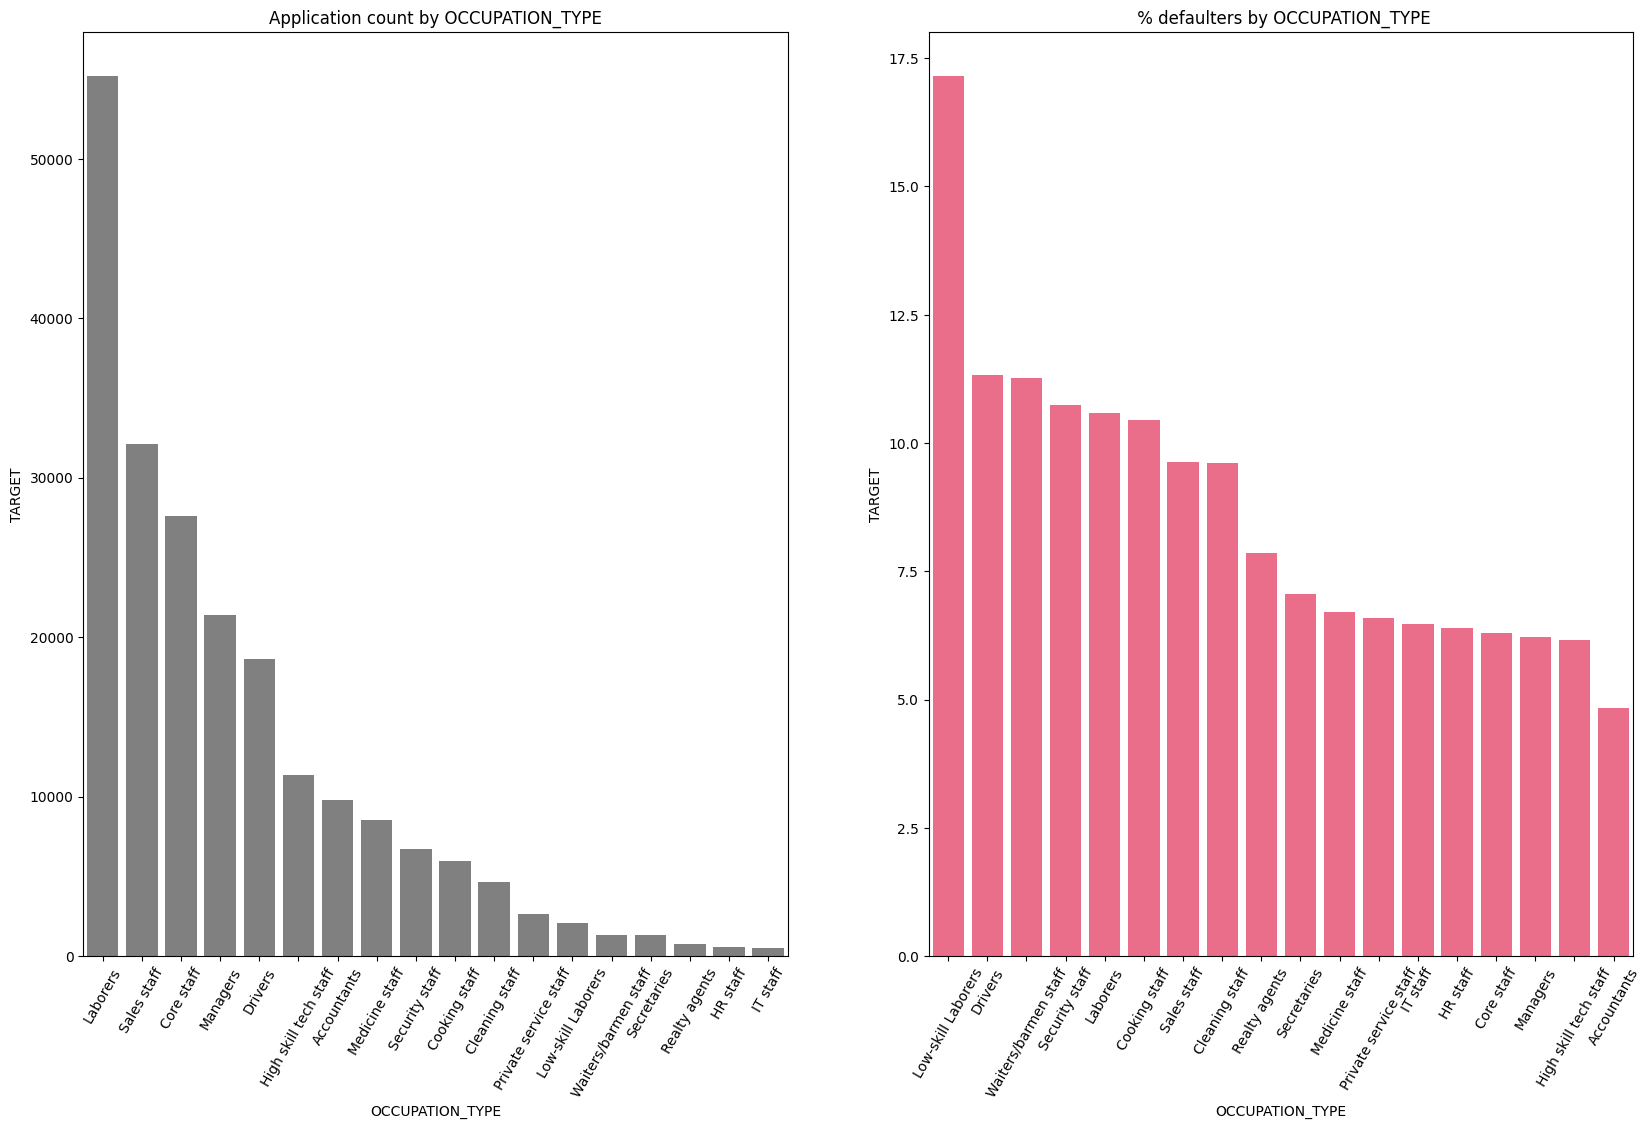

In [110]:
perc_of_defaulters('OCCUPATION_TYPE')

In [114]:
pair_plot = df_c[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','TARGET']].fillna(0)

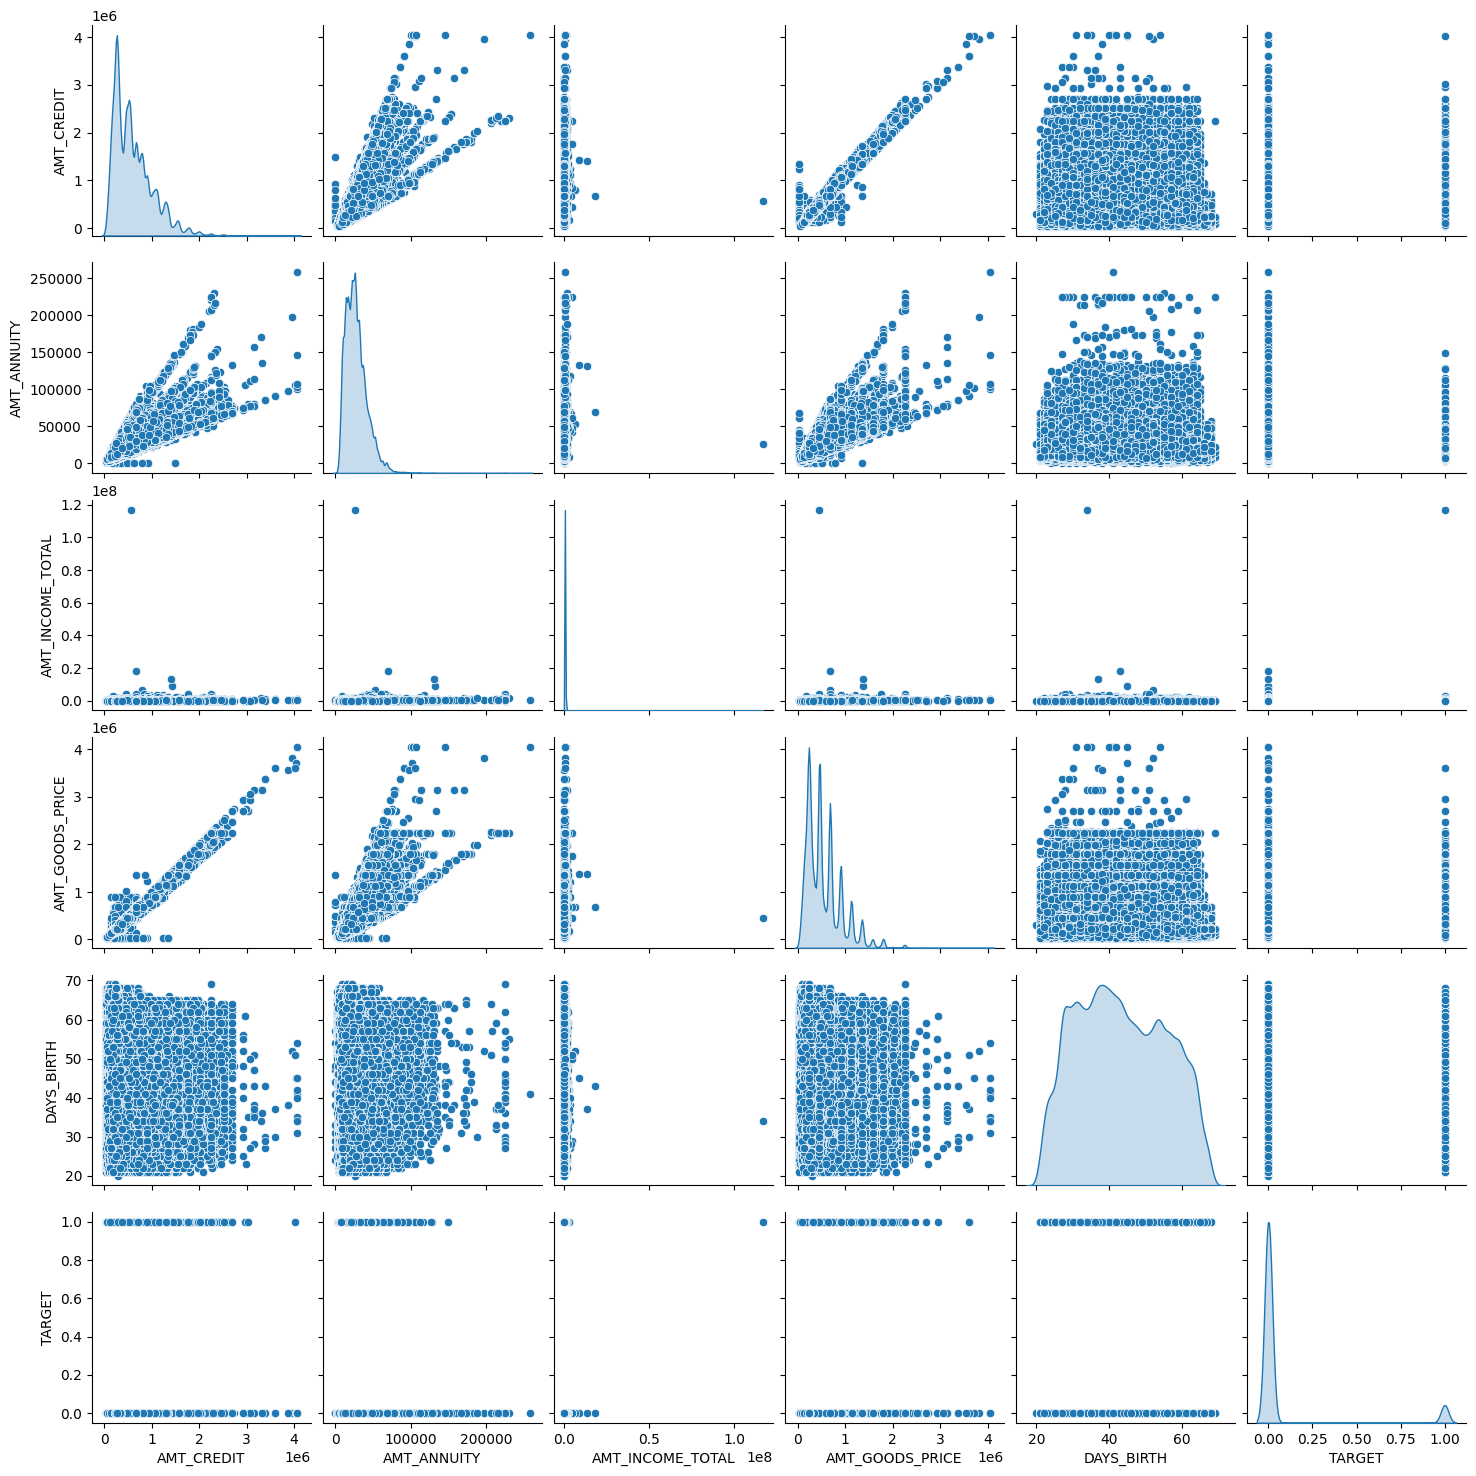

In [115]:
sns.pairplot(pair_plot,diag_kind='kde')

<Axes: >

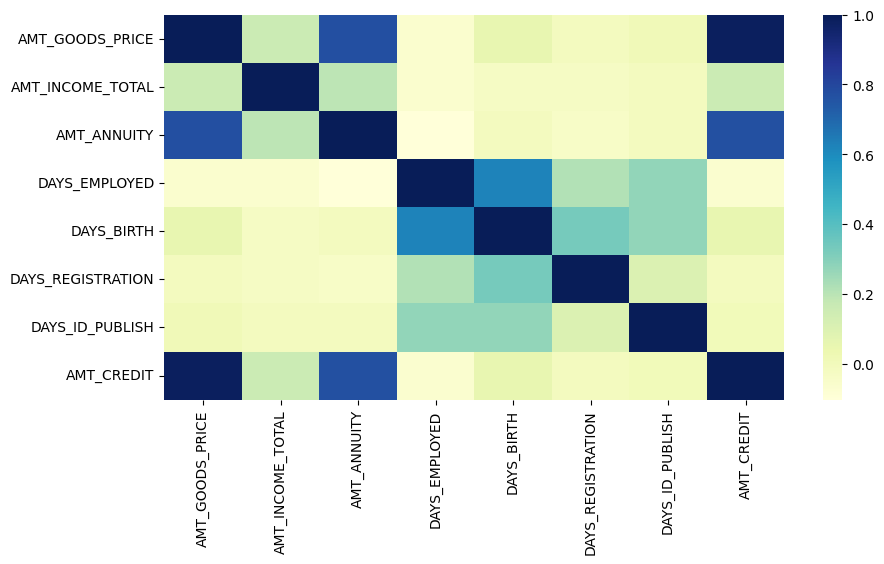

In [117]:
sns.heatmap(df_c[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method='pearson'),cmap='YlGnBu')